In [134]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
# Read data
df = pd.read_csv('data/phoenix_housing.csv', parse_dates = [6, 11])
print '# of Rows: {} and # of Columns: {}'.format(df.shape[0], df.shape[1])
print '# of unique Listing Ids: ', len(df['ListingId'].unique())
df.head(3)

# of Rows: 57258 and # of Columns: 15
# of unique Listing Ids:  57258


,ListingId,LivingArea,NumBedrooms,NumBaths,Pool,ExteriorStories,ListDate,ListPrice,GeoLat,GeoLon,PublicRemarks,CloseDate,ClosePrice,ListingStatus,DwellingType
0,5077399,3054.0,4,2.5,Private,1.0,2014-03-04,675000.0,33.593239,-111.961056,This property OUTSTANDING offers outdoor livin...,NaT,NaN,Cancelled,Single Family - Detached
1,5077408,2230.0,4,2.0,Private,1.0,2014-03-01,475000.0,33.650984,-111.963151,Very special home in popular Arabian Views fee...,2014-06-24,460000.0,Closed,Single Family - Detached
2,5077486,1601.0,3,2.0,Private,1.0,2014-03-01,279900.0,33.692122,-112.038019,Welcome home to a beautiful remodeled. Single ...,2014-07-15,279900.0,Closed,Single Family - Detached


In [136]:
# Dataframe columns
print 'Dataframe columns: \n', df.columns.values

Dataframe columns: 
['ListingId' 'LivingArea' 'NumBedrooms' 'NumBaths' 'Pool' 'ExteriorStories'
 'ListDate' 'ListPrice' 'GeoLat' 'GeoLon' 'PublicRemarks' 'CloseDate'
 'ClosePrice' 'ListingStatus' 'DwellingType']


In [137]:
print df['ListDate'].min()
print df['ListDate'].max()

2014-03-01 00:00:00
2014-08-31 00:00:00


In [138]:
drop_cols = ['ListingId', 'ExteriorStories', 'ListDate', 'ListPrice', 
             'GeoLat', 'GeoLon', 'PublicRemarks', 'CloseDate', 'ListingStatus']
df = df.drop(drop_cols, axis=1)

### EDA
- [Standardize Data for Neural Network](https://visualstudiomagazine.com/Articles/2014/01/01/How-To-Standardize-Data-for-Neural-Networks.aspx?Page=1)

In [139]:
# Need to predict ClosePrice: Drop missing values
df = df[np.isfinite(df['ClosePrice'])]

In [140]:
print 'Number of Bedrooms: ', list(np.sort(df['NumBedrooms'].unique()))

Number of Bedrooms:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 16]


In [141]:
# Get count of house listings by number of bedrooms
num_bedrooms = list(np.sort(df['NumBedrooms'].unique()))
for num_bedroom in num_bedrooms:
    temp_df = df[df['NumBedrooms'] == num_bedroom]
    print 'Number of Bedrooms: ' + str(num_bedroom) + ' --> count: ' + str(temp_df.shape[0])

Number of Bedrooms: 0 --> count: 16
Number of Bedrooms: 1 --> count: 697
Number of Bedrooms: 2 --> count: 6433
Number of Bedrooms: 3 --> count: 17008
Number of Bedrooms: 4 --> count: 10921
Number of Bedrooms: 5 --> count: 2528
Number of Bedrooms: 6 --> count: 290
Number of Bedrooms: 7 --> count: 36
Number of Bedrooms: 8 --> count: 3
Number of Bedrooms: 16 --> count: 2


In [142]:
print 'Number of Baths: ', list(np.sort(df['NumBaths'].unique()))

Number of Baths:  [0.0, 0.070000000000000007, 0.75, 1.0, 1.25, 1.3400000000000001, 1.5, 1.5700000000000001, 1.7, 1.72, 1.75, 2.0, 2.1000000000000001, 2.25, 2.3300000000000001, 2.5, 2.5299999999999998, 2.6499999999999999, 2.6699999999999999, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 9.0, 10.0, 11.0, 22.0, 25.0, 134.0, 175.0, 205.0, 212.0, 1047.0]


In [143]:
# Get count of house listings by number of bedrooms
num_baths = list(np.sort(df['NumBaths'].unique()))
for num_bath in num_baths:
    temp_df = df[df['NumBaths'] == num_bath]
    print 'Number of Bathrooms: ' + str(num_bath) + ' --> count: ' + str(temp_df.shape[0])

Number of Bathrooms: 0.0 --> count: 5
Number of Bathrooms: 0.07 --> count: 1
Number of Bathrooms: 0.75 --> count: 5
Number of Bathrooms: 1.0 --> count: 1956
Number of Bathrooms: 1.25 --> count: 10
Number of Bathrooms: 1.34 --> count: 1
Number of Bathrooms: 1.5 --> count: 538
Number of Bathrooms: 1.57 --> count: 1
Number of Bathrooms: 1.7 --> count: 2
Number of Bathrooms: 1.72 --> count: 1
Number of Bathrooms: 1.75 --> count: 2285
Number of Bathrooms: 2.0 --> count: 19858
Number of Bathrooms: 2.1 --> count: 2
Number of Bathrooms: 2.25 --> count: 33
Number of Bathrooms: 2.33 --> count: 1
Number of Bathrooms: 2.5 --> count: 6307
Number of Bathrooms: 2.53 --> count: 1
Number of Bathrooms: 2.65 --> count: 1
Number of Bathrooms: 2.67 --> count: 1
Number of Bathrooms: 2.75 --> count: 261
Number of Bathrooms: 3.0 --> count: 4361
Number of Bathrooms: 3.25 --> count: 3
Number of Bathrooms: 3.5 --> count: 1313
Number of Bathrooms: 3.75 --> count: 25
Number of Bathrooms: 4.0 --> count: 418
Number 

In [144]:
# Clean NumBaths
def clean_num_baths(num):
    if num <= 0.5:
        return 0
    elif num > 0.5 and num <= 1:
        return 1
    elif num > 1 and num <= 1.5:
        return 1.5
    elif num > 1.5 and num <= 2:
        return 2
    elif num > 2 and num <= 2.5:
        return 2.5
    elif num > 2.5 and num <= 3:
        return 3
    elif num > 3 and num <= 3.5:
        return 3.5
    elif num > 3.5 and num <= 4:
        return 4
    elif num > 4 and num <= 4.5:
        return 4.5
    elif num > 4.5 and num <= 5:
        return 5
    elif num > 5 and num <= 5.5:
        return 5.5
    elif num > 5.5 and num <= 6:
        return 6
    elif num > 6 and num <= 6.5:
        return 6.5
    elif num > 6.5 and num <= 7:
        return 7
    elif num > 7 and num <= 7.5:
        return 7.5
    elif num > 7.5 and num <= 8:
        return 8
    else:
        return -1

In [145]:
# Clean
df['num_baths'] = df['NumBaths'].apply(lambda n: clean_num_baths(n))

In [146]:
# Remove rows where num_bath > 8
df = df[df['num_baths'] != -1]

In [147]:
# Get count of house listings by number of bedrooms
num_baths = list(np.sort(df['num_baths'].unique()))
for num_bath in num_baths:
    temp_df = df[df['num_baths'] == num_bath]
    print 'Number of Bathrooms: ' + str(num_bath) + ' --> count: ' + str(temp_df.shape[0])

Number of Bathrooms: 0.0 --> count: 6
Number of Bathrooms: 1.0 --> count: 1961
Number of Bathrooms: 1.5 --> count: 549
Number of Bathrooms: 2.0 --> count: 22147
Number of Bathrooms: 2.5 --> count: 6343
Number of Bathrooms: 3.0 --> count: 4625
Number of Bathrooms: 3.5 --> count: 1316
Number of Bathrooms: 4.0 --> count: 443
Number of Bathrooms: 4.5 --> count: 320
Number of Bathrooms: 5.0 --> count: 73
Number of Bathrooms: 5.5 --> count: 67
Number of Bathrooms: 6.0 --> count: 36
Number of Bathrooms: 6.5 --> count: 16
Number of Bathrooms: 7.0 --> count: 13
Number of Bathrooms: 7.5 --> count: 1
Number of Bathrooms: 8.0 --> count: 7


In [148]:
print 'Pool Type: ', list(np.sort(df['Pool'].unique()))

Pool Type:  ['Both Private & Community', 'Community', 'None', 'Private']


In [149]:
# Get count of house listings by number of bedrooms
pool_types = list(np.sort(df['Pool'].unique()))
for pool in pool_types:
    temp_df = df[df['Pool'] == pool]
    print 'Pool Type: ' + pool + ' --> count: ' + str(temp_df.shape[0])

Pool Type: Both Private & Community --> count: 1410
Pool Type: Community --> count: 9509
Pool Type: None --> count: 17629
Pool Type: Private --> count: 9375


In [150]:
print 'Dwelling Type: ', list(np.sort(df['DwellingType'].unique()))

Dwelling Type:  ['Apartment Style/Flat', 'Gemini/Twin Home', 'Loft Style', 'Mfg/Mobile Housing', 'Modular/Pre-Fab', 'Patio Home', 'Single Family - Detached', 'Townhouse']


In [151]:
# Get count of dwelling type
dwelling_types = list(np.sort(df['DwellingType'].unique()))
for dwelling_type in dwelling_types:
    temp_df = df[df['DwellingType'] == dwelling_type]
    print 'Dwelling Type: ' + dwelling_type + ' count: ' + str(temp_df.shape[0])

Dwelling Type: Apartment Style/Flat count: 1796
Dwelling Type: Gemini/Twin Home count: 258
Dwelling Type: Loft Style count: 30
Dwelling Type: Mfg/Mobile Housing count: 731
Dwelling Type: Modular/Pre-Fab count: 16
Dwelling Type: Patio Home count: 503
Dwelling Type: Single Family - Detached count: 31989
Dwelling Type: Townhouse count: 2600


In [152]:
# Get mean area by dwelling type
dwelling_types = list(np.sort(df['DwellingType'].unique()))
for dwelling_type in dwelling_types:
    temp_df = df[df['DwellingType'] == dwelling_type]
    print dwelling_type + ' average living area: ' + str(temp_df['LivingArea'].mean())

Apartment Style/Flat average living area: 1071.0424581
Gemini/Twin Home average living area: 1424.77906977
Loft Style average living area: 1191.5
Mfg/Mobile Housing average living area: 1336.45530726
Modular/Pre-Fab average living area: 1394.5
Patio Home average living area: 1466.83665339
Single Family - Detached average living area: 2057.3157227
Townhouse average living area: 1360.03008099


In [153]:
# Living Area outliers
temp = df['LivingArea']
living_area = np.sort(temp.unique())
print 'Area lows: ', list(living_area[:10])
print 'Area highs: ', list(living_area[len(living_area)-10:])

Area lows:  [0.0, 1.0, 160.0, 168.0, 246.0, 288.0, 386.0, 390.0, 394.0, 395.0]
Area highs:  [7978.0, 8036.0, 8100.0, 8317.0, 8822.0, 8861.0, 9320.0, 10059.0, 16267.0, nan]


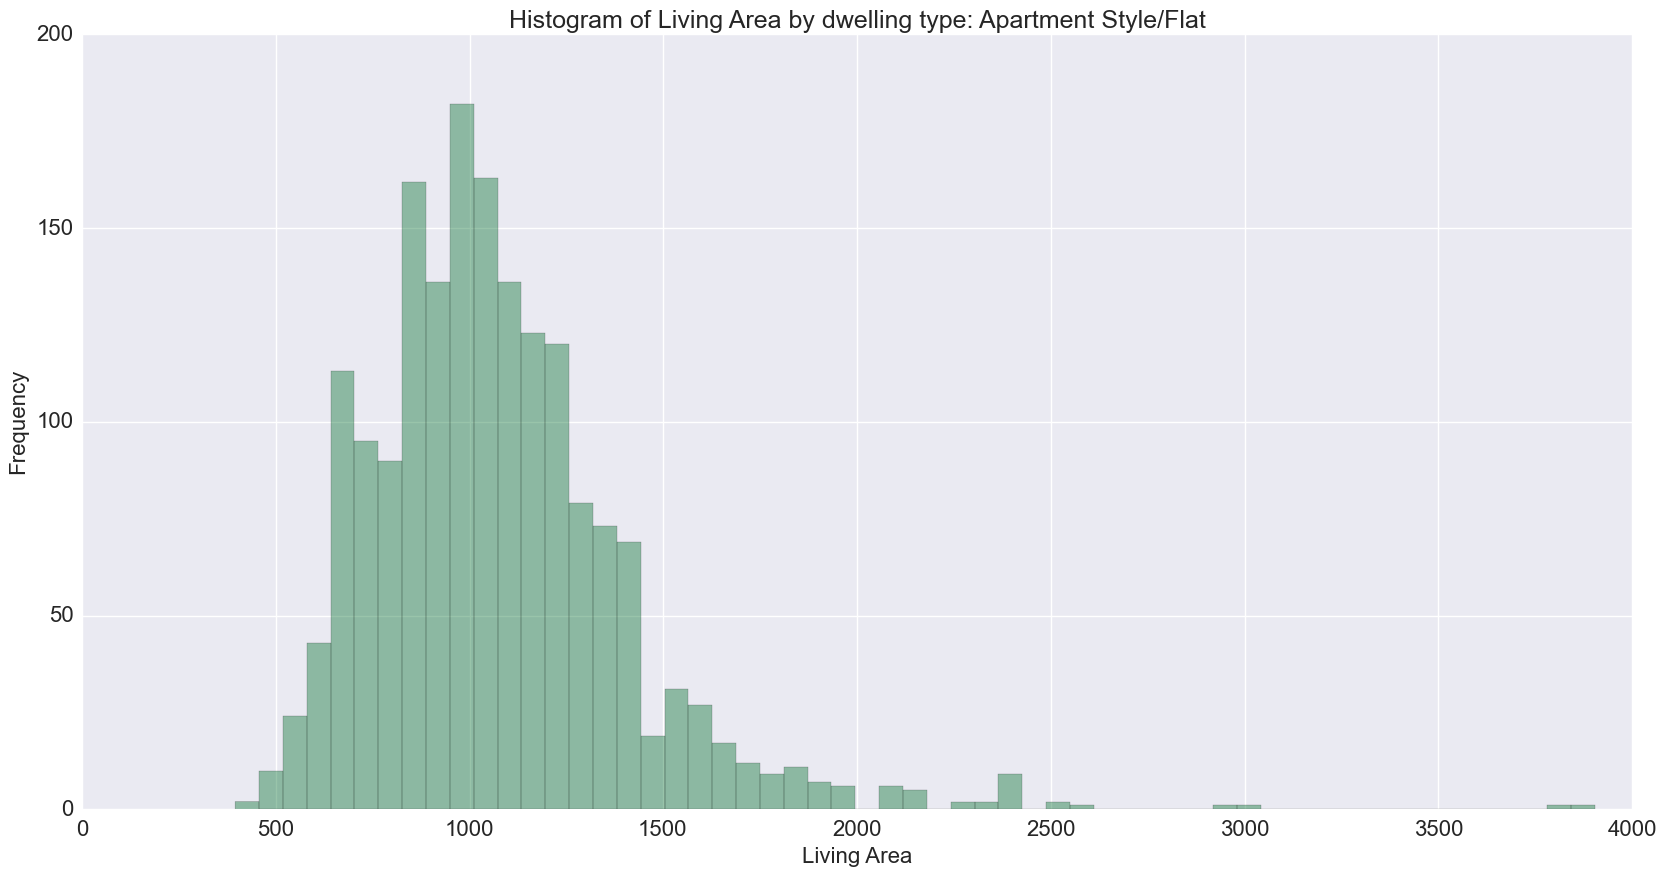

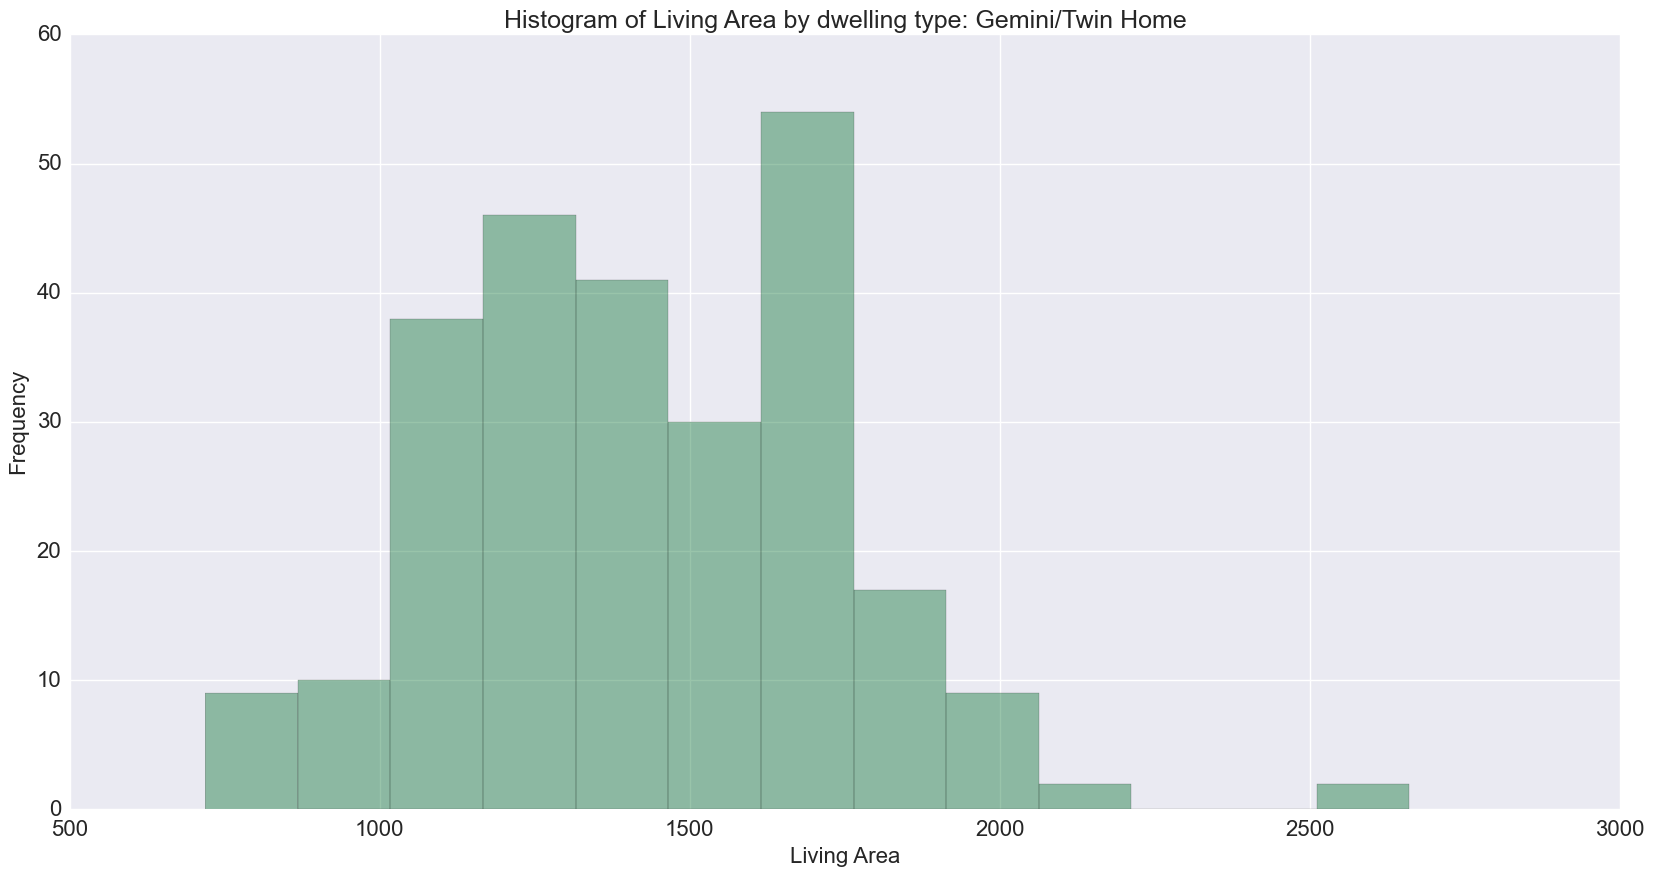

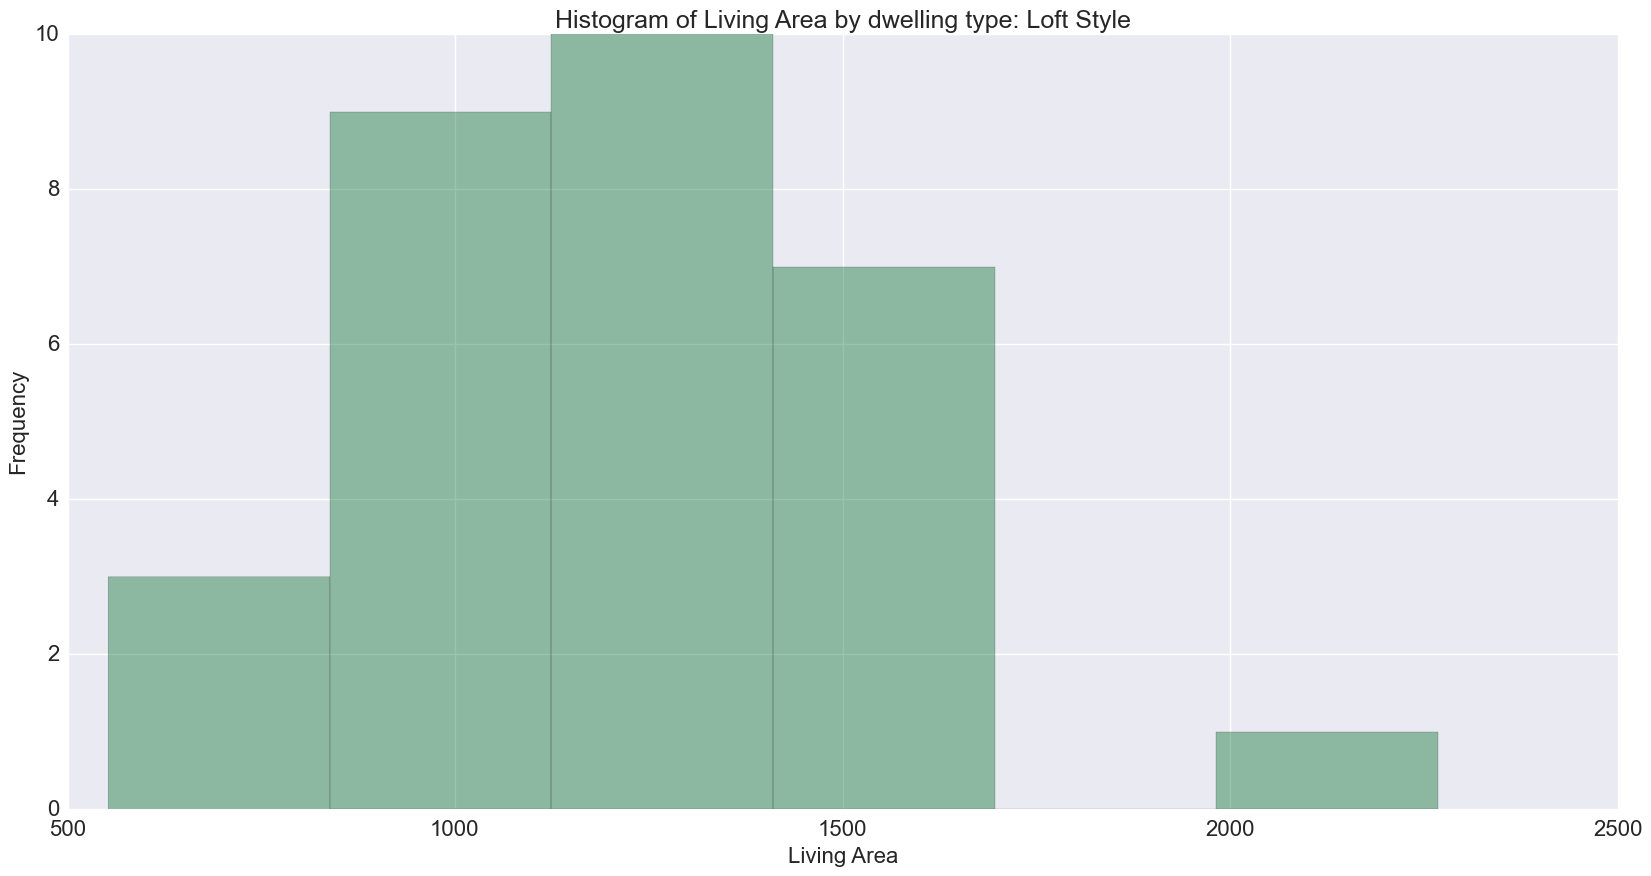

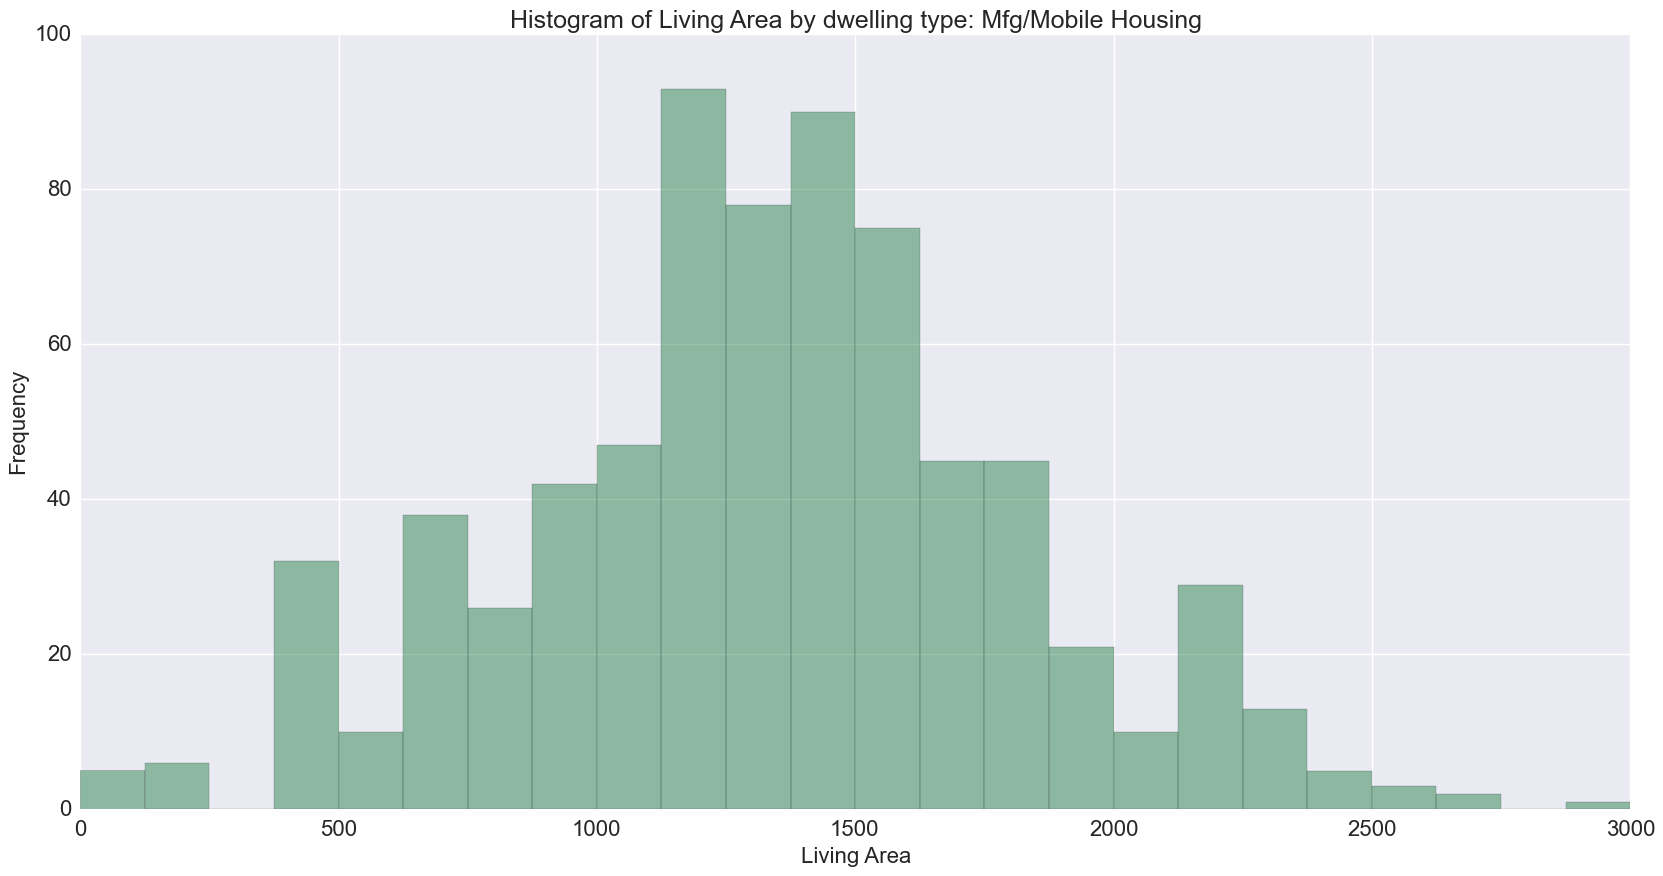

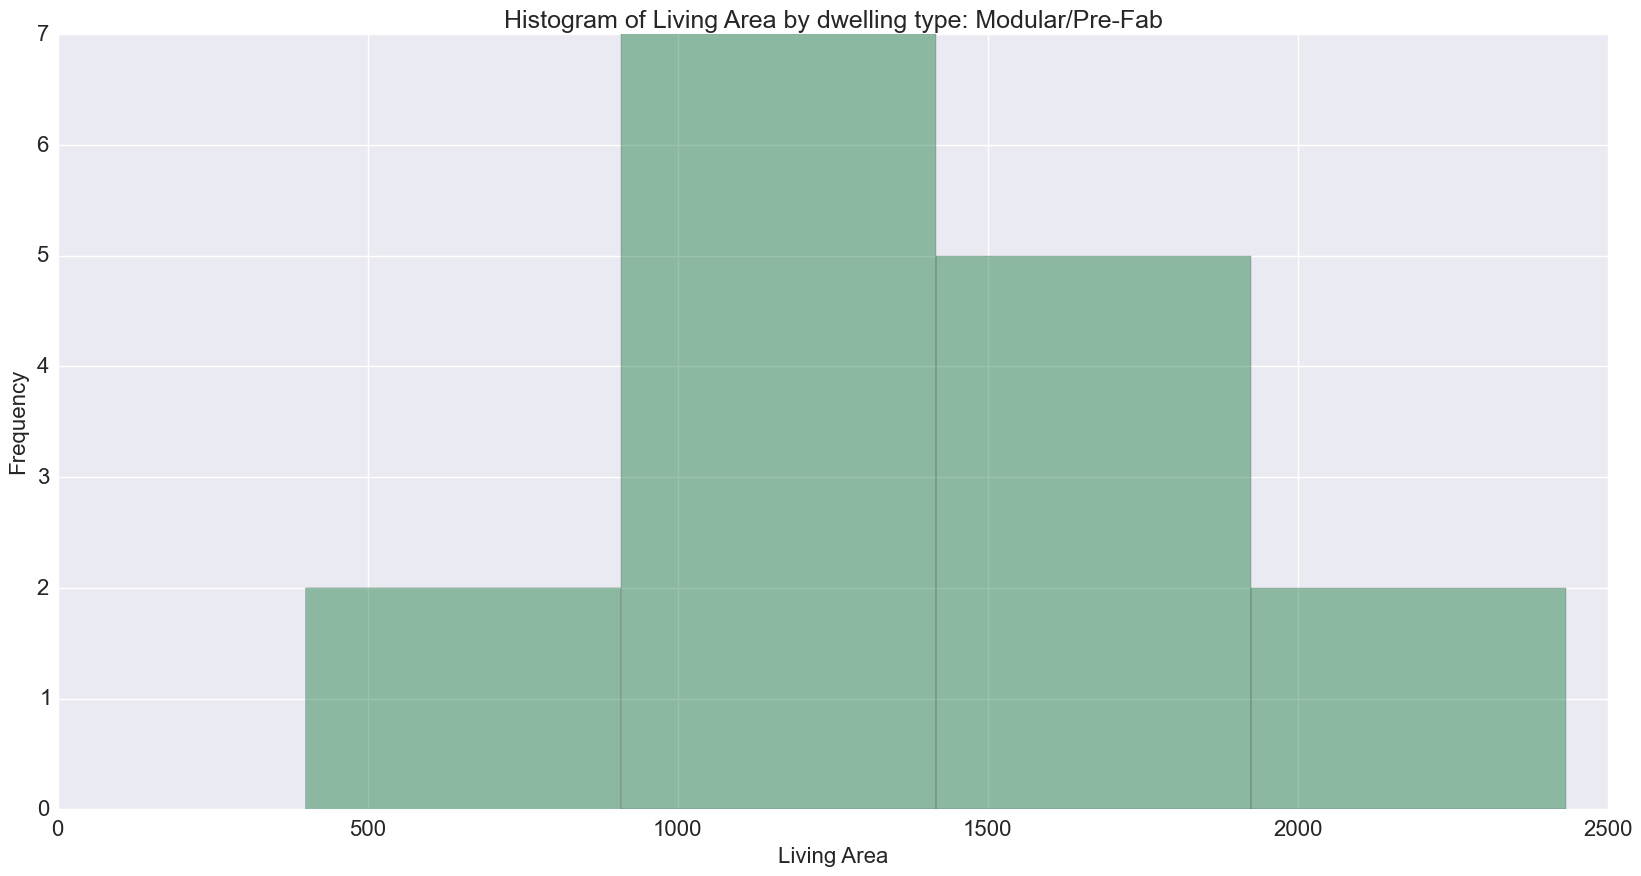

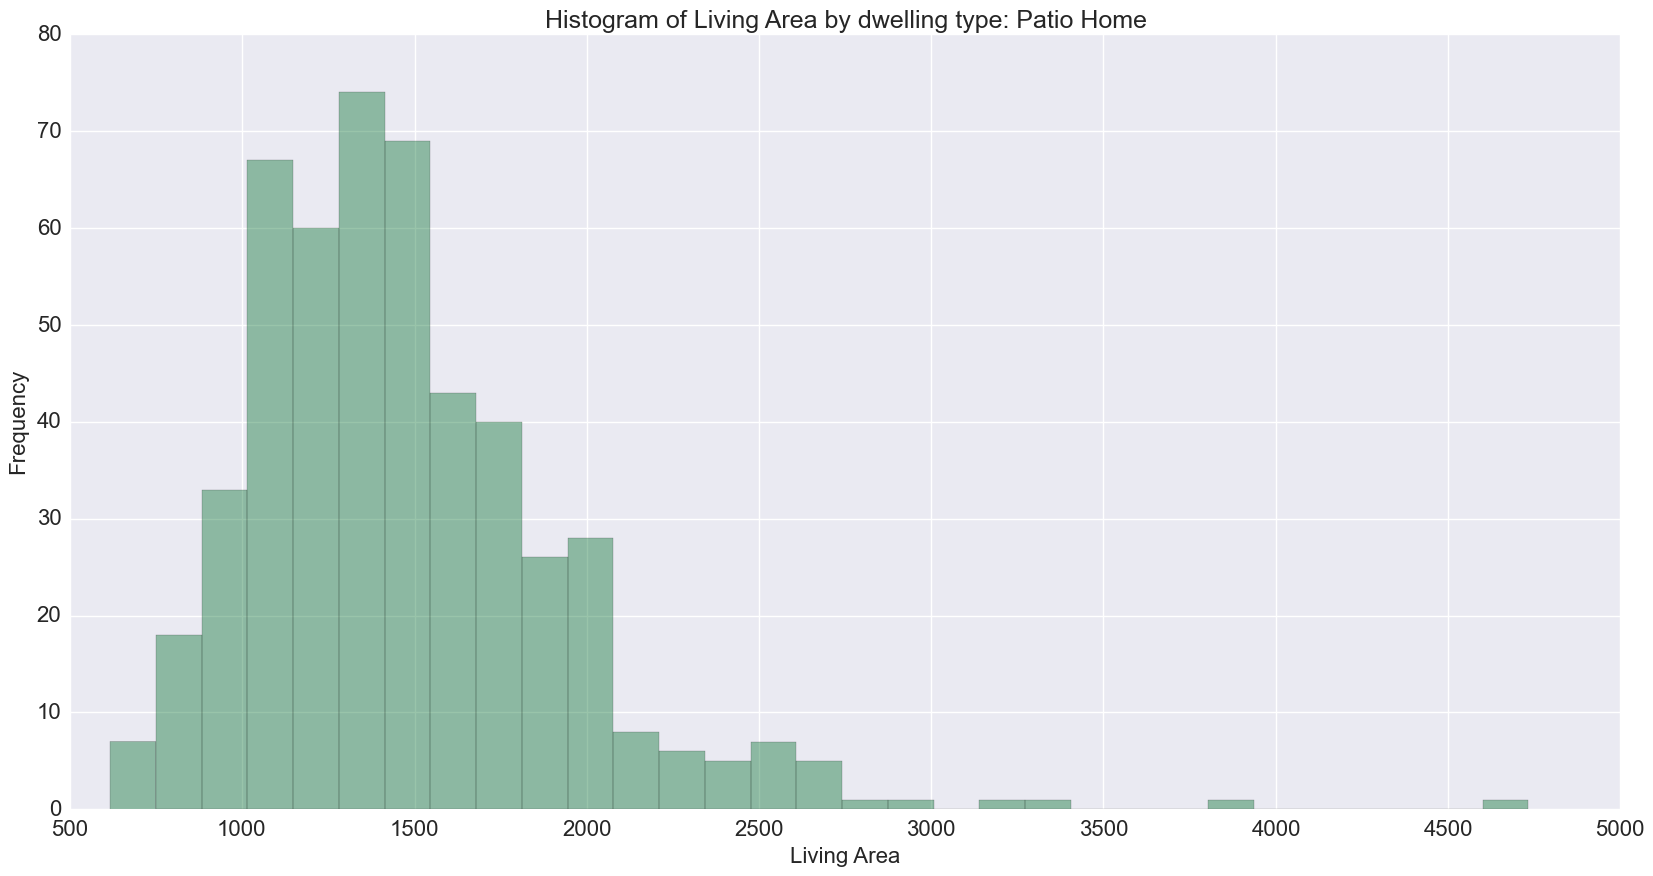

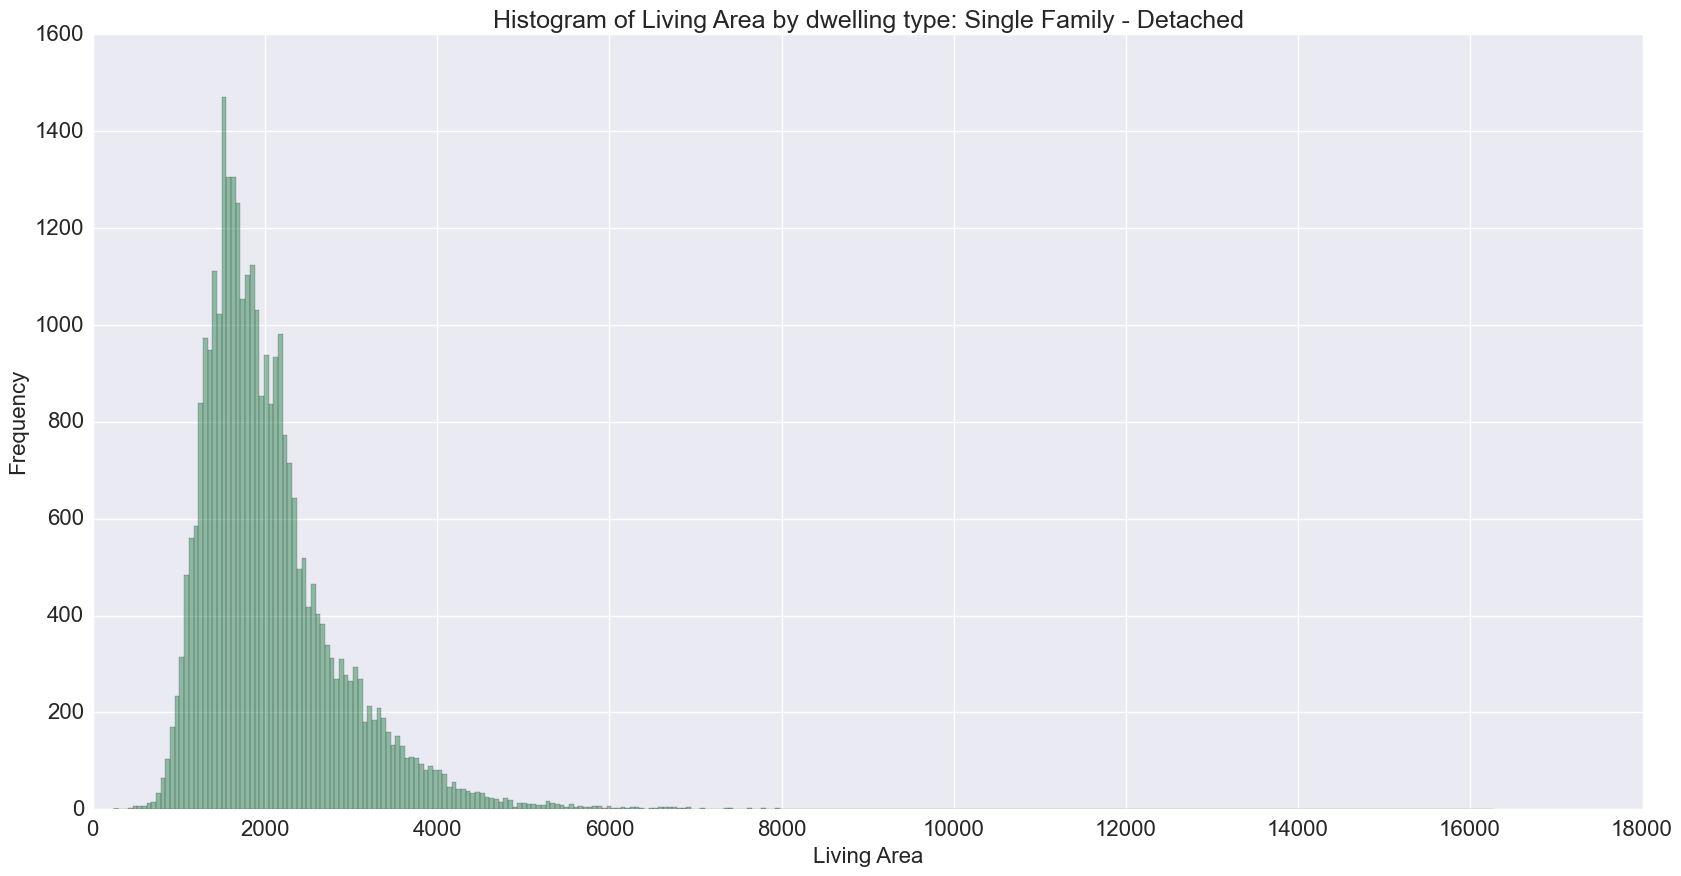

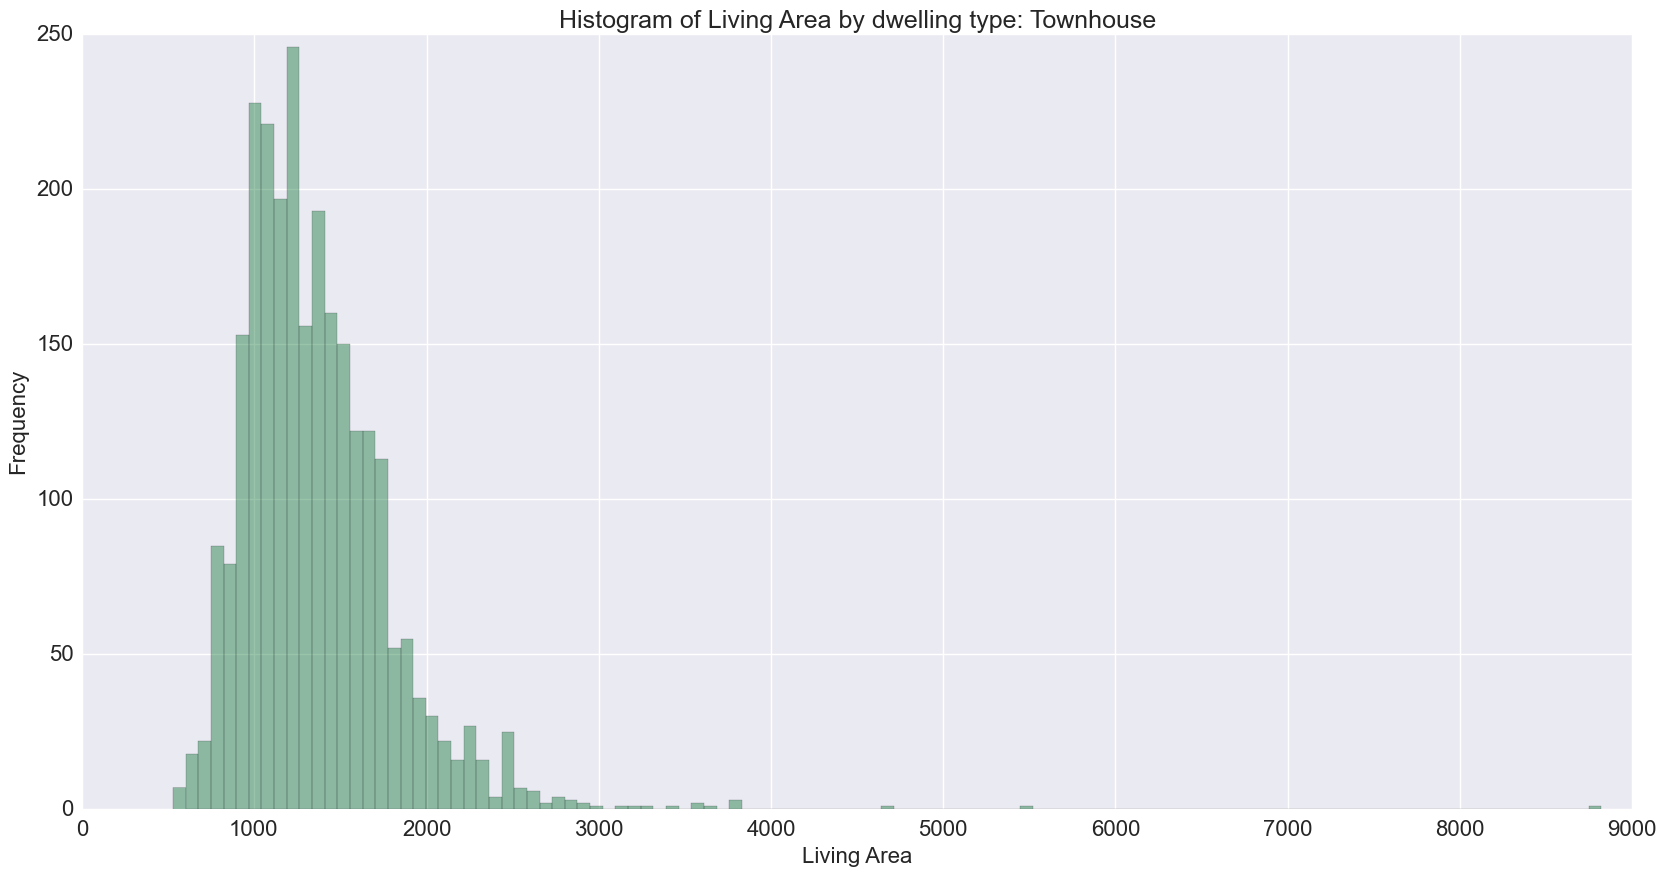

In [154]:
# Check Living Area by dwelling type
for dwelling_type in dwelling_types:
    temp_df = df[df['DwellingType'] == dwelling_type]
    plt.figure(figsize = (20, 10))
    sns.distplot(temp_df['LivingArea'].dropna(), kde = False, rug = False, color =  '#006d2c')
    plt.xlabel('Living Area', fontsize = 16)
    plt.ylabel('Frequency', fontsize = 16)
    plt.tick_params(axis = 'both', which = 'major', labelsize = 16)
    plt.title('Histogram of Living Area by dwelling type: ' + dwelling_type, fontsize = 18)

In [155]:
for dwelling_type in dwelling_types:
    temp_df = df[df['DwellingType'] == dwelling_type]['LivingArea']
    min_val = temp_df.min()
    max_val = temp_df.max()
    print 'Dwelling type: ' + dwelling_type + ' min living area: {} and max living area: {}'.format(min_val, max_val)

Dwelling type: Apartment Style/Flat min living area: 395.0 and max living area: 3904.0
Dwelling type: Gemini/Twin Home min living area: 718.0 and max living area: 2660.0
Dwelling type: Loft Style min living area: 552.0 and max living area: 2268.0
Dwelling type: Mfg/Mobile Housing min living area: 0.0 and max living area: 3000.0
Dwelling type: Modular/Pre-Fab min living area: 400.0 and max living area: 2432.0
Dwelling type: Patio Home min living area: 616.0 and max living area: 4734.0
Dwelling type: Single Family - Detached min living area: 246.0 and max living area: 16267.0
Dwelling type: Townhouse min living area: 528.0 and max living area: 8822.0


In [156]:
df[(df['LivingArea'] >= 150) & (df['LivingArea'] <= 10000)].describe()

,LivingArea,NumBedrooms,NumBaths,ClosePrice,num_baths
count,37820.000000,37820.000000,37820.000000,3.782000e+04,37820.000000
mean,1935.746444,3.241407,2.246675,2.404218e+05,2.264053
std,806.233771,0.909943,0.643536,1.945826e+05,0.636595
min,160.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,1400.000000,3.000000,2.000000,1.400000e+05,2.000000
50%,1761.000000,3.000000,2.000000,1.950000e+05,2.000000
75%,2277.000000,4.000000,2.500000,2.809925e+05,2.500000
max,9320.000000,8.000000,8.000000,5.500000e+06,8.000000


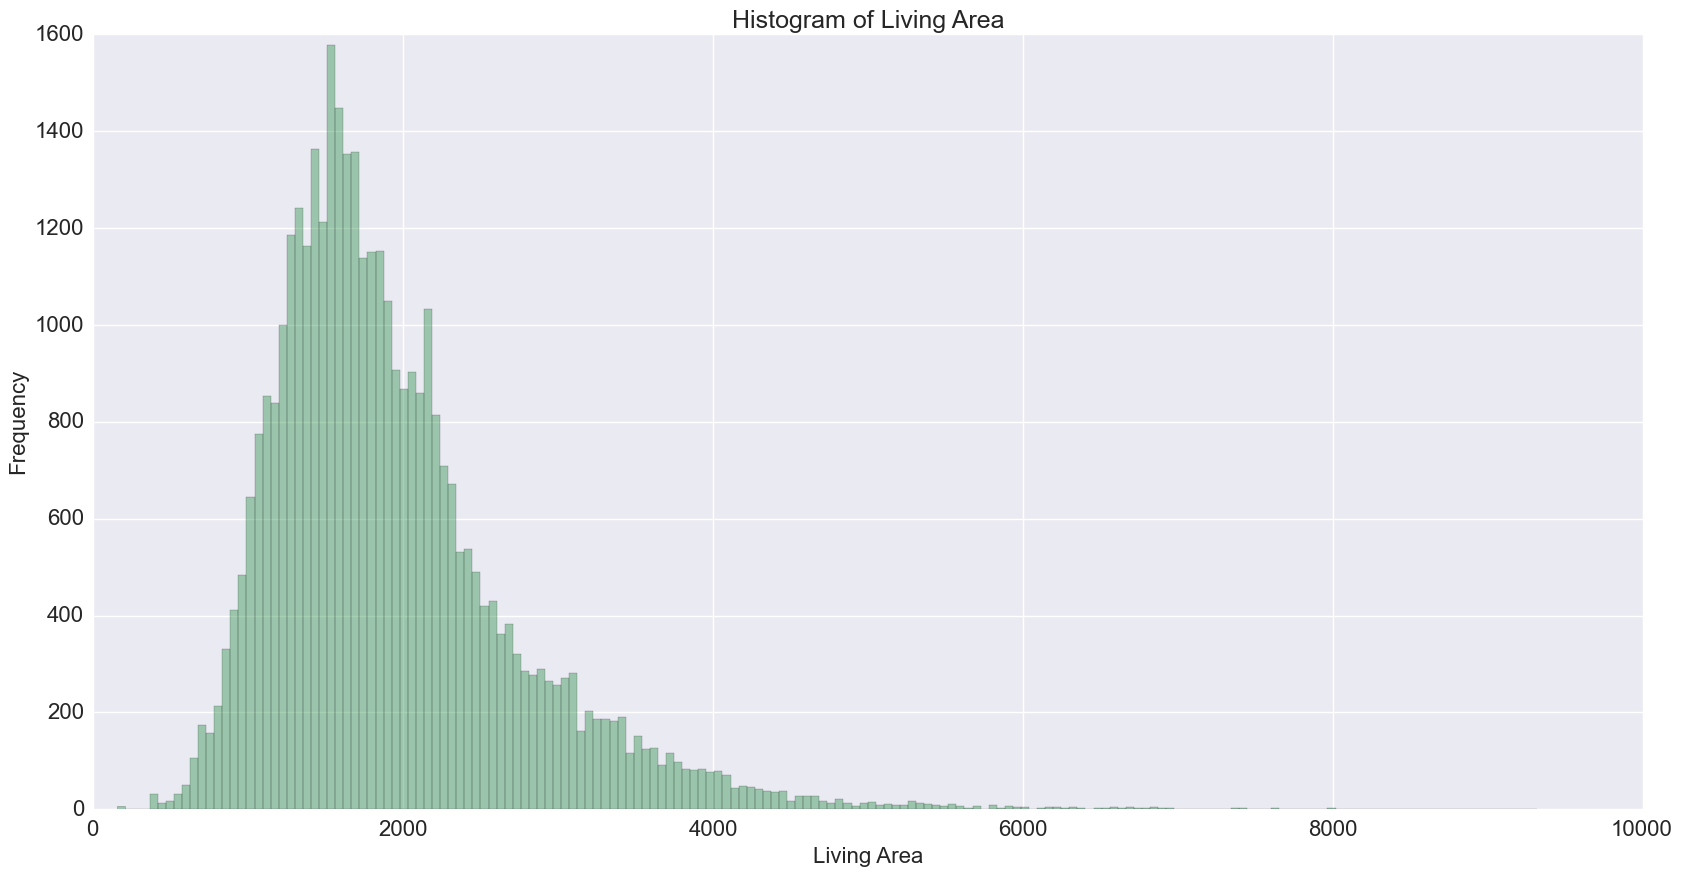

In [157]:
temp_df = df[(df['LivingArea'] >= 150) & (df['LivingArea'] <= 10000)]
plt.figure(figsize = (20, 10))
sns.distplot(temp_df['LivingArea'].dropna(), kde = False, rug = False, color =  '#238b45')
plt.xlabel('Living Area', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 16)
plt.title('Histogram of Living Area', fontsize = 18)

**Note:** 
- Living Area Outliers: <font color=red>Need to remove datapoints where LivingArea is less than 150 and LivingArea is greater than 10000. </font> **Right tailed distribution**

In [158]:
# Remove LivingArea outliers
df = df[(df['LivingArea'] >= 150) & (df['LivingArea'] <= 10000)]

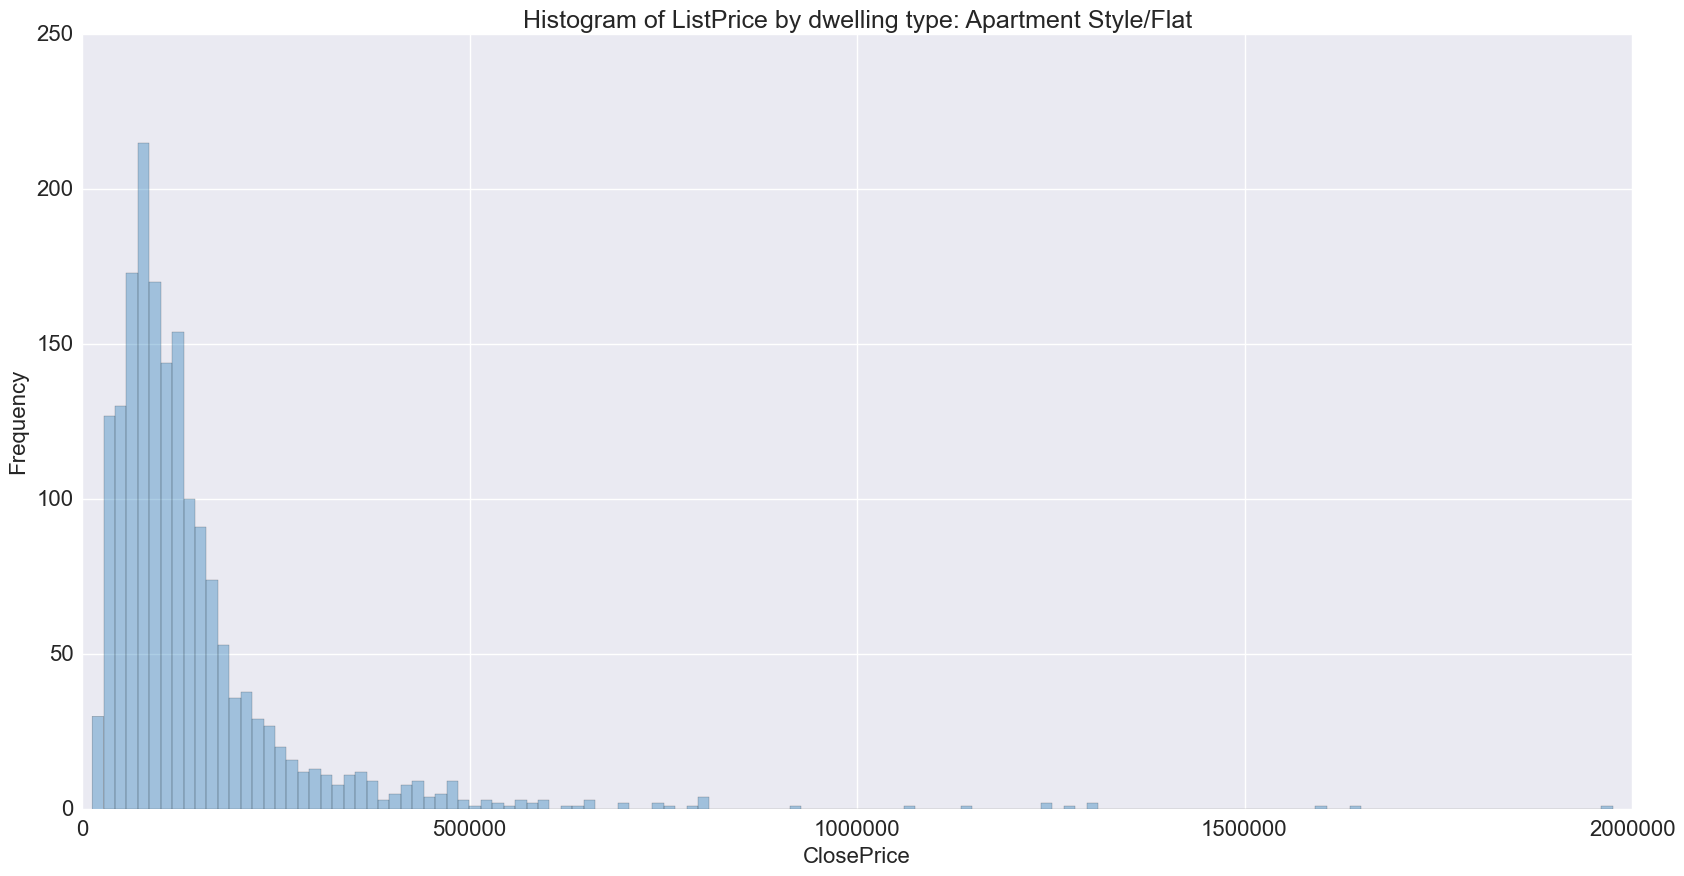

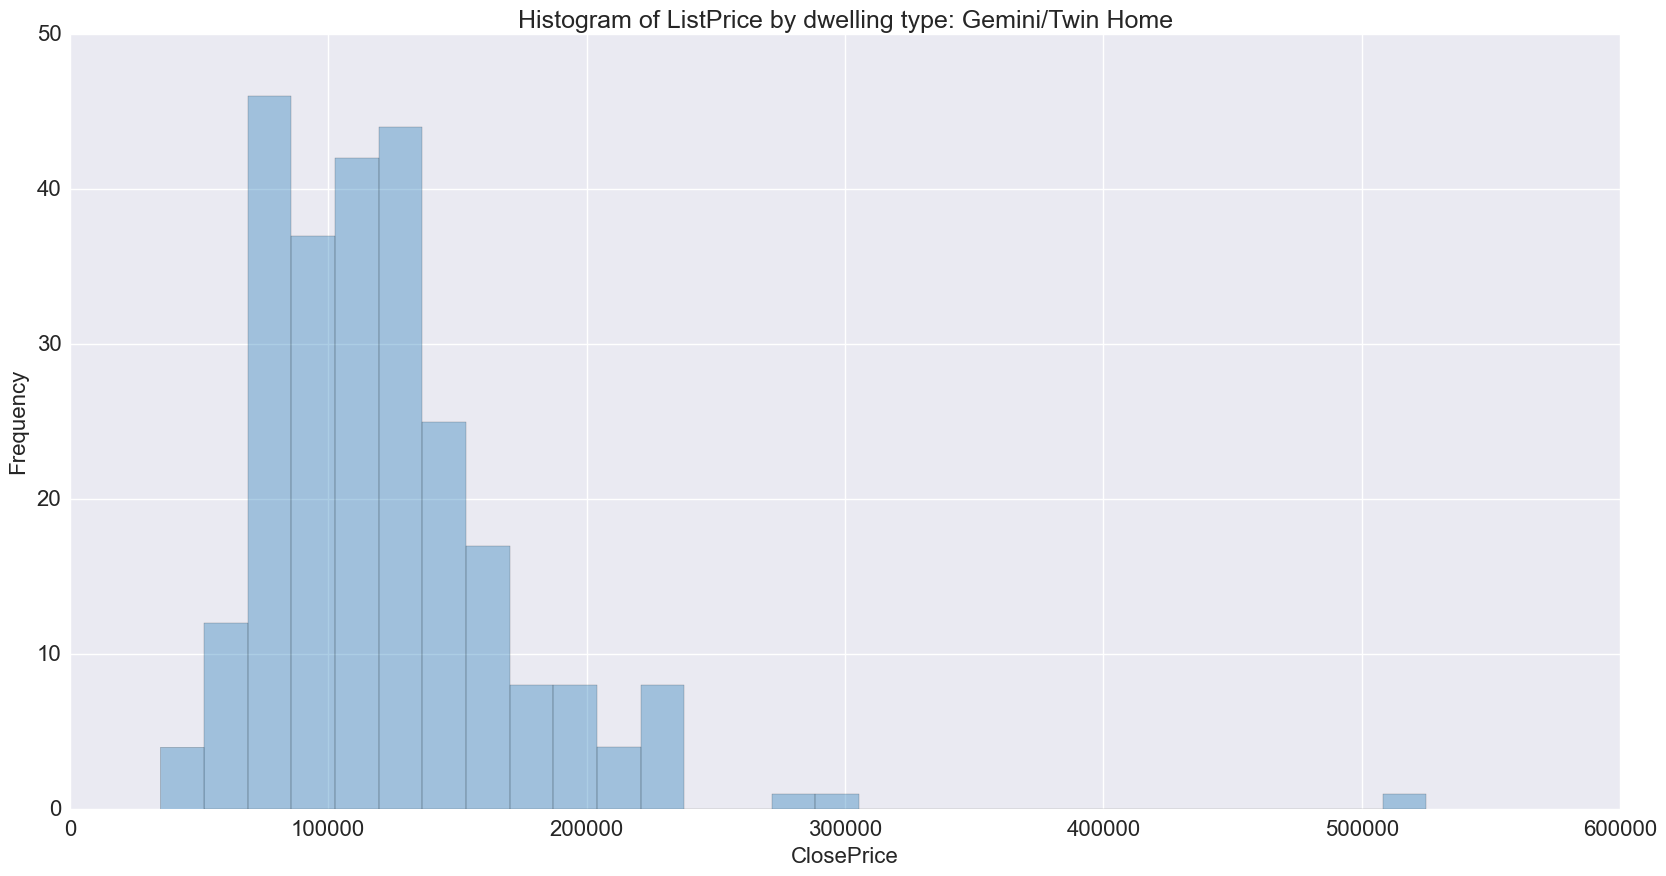

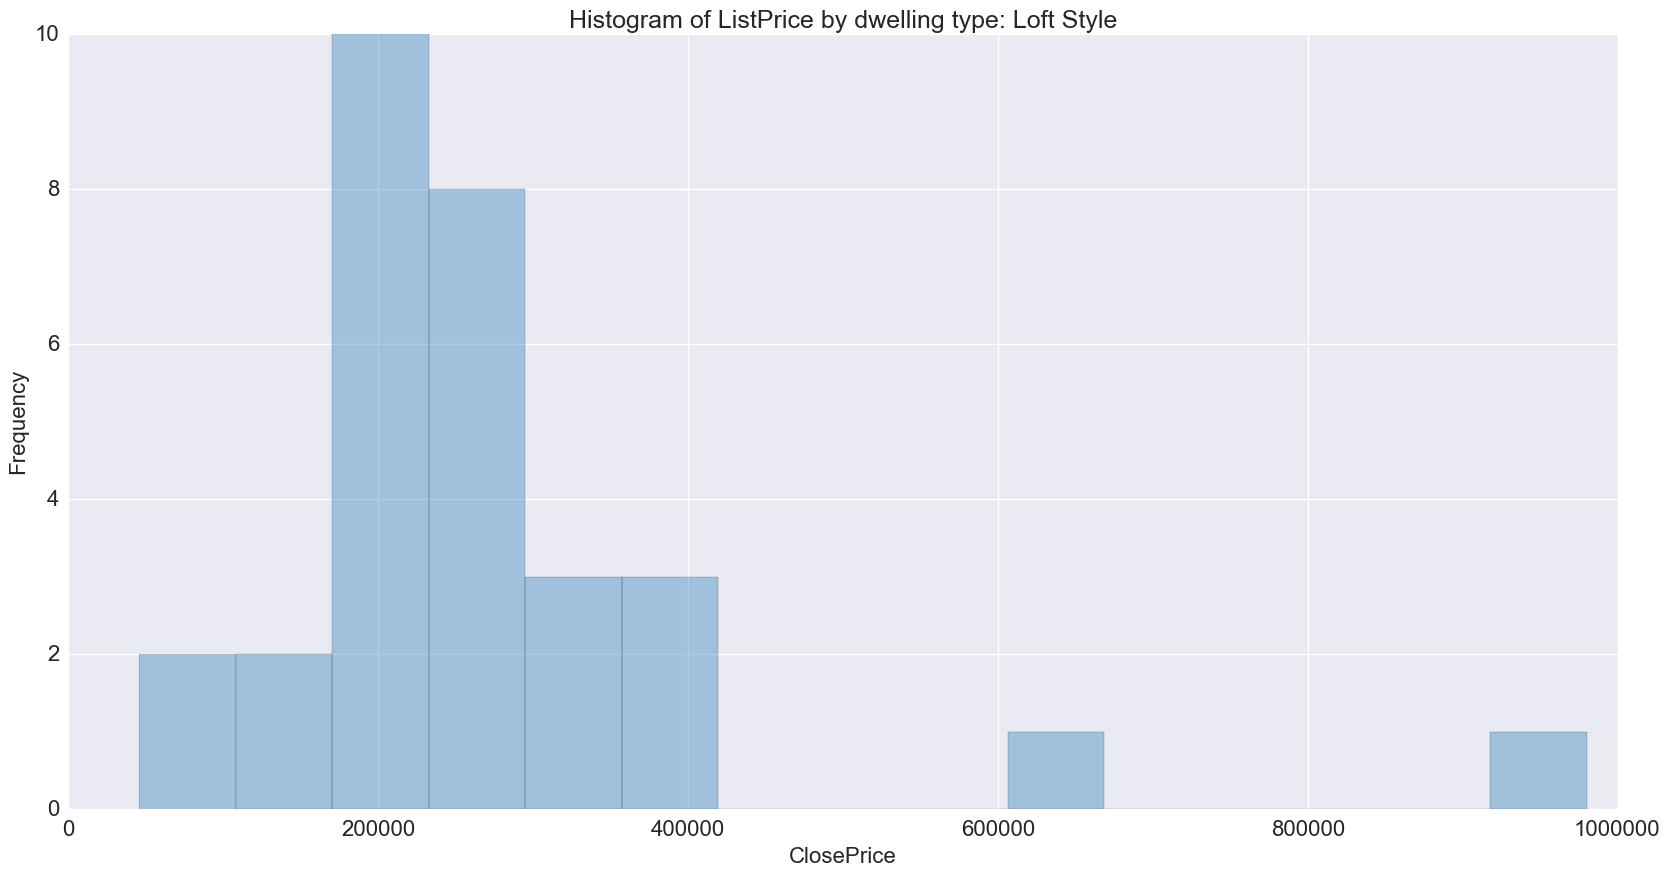

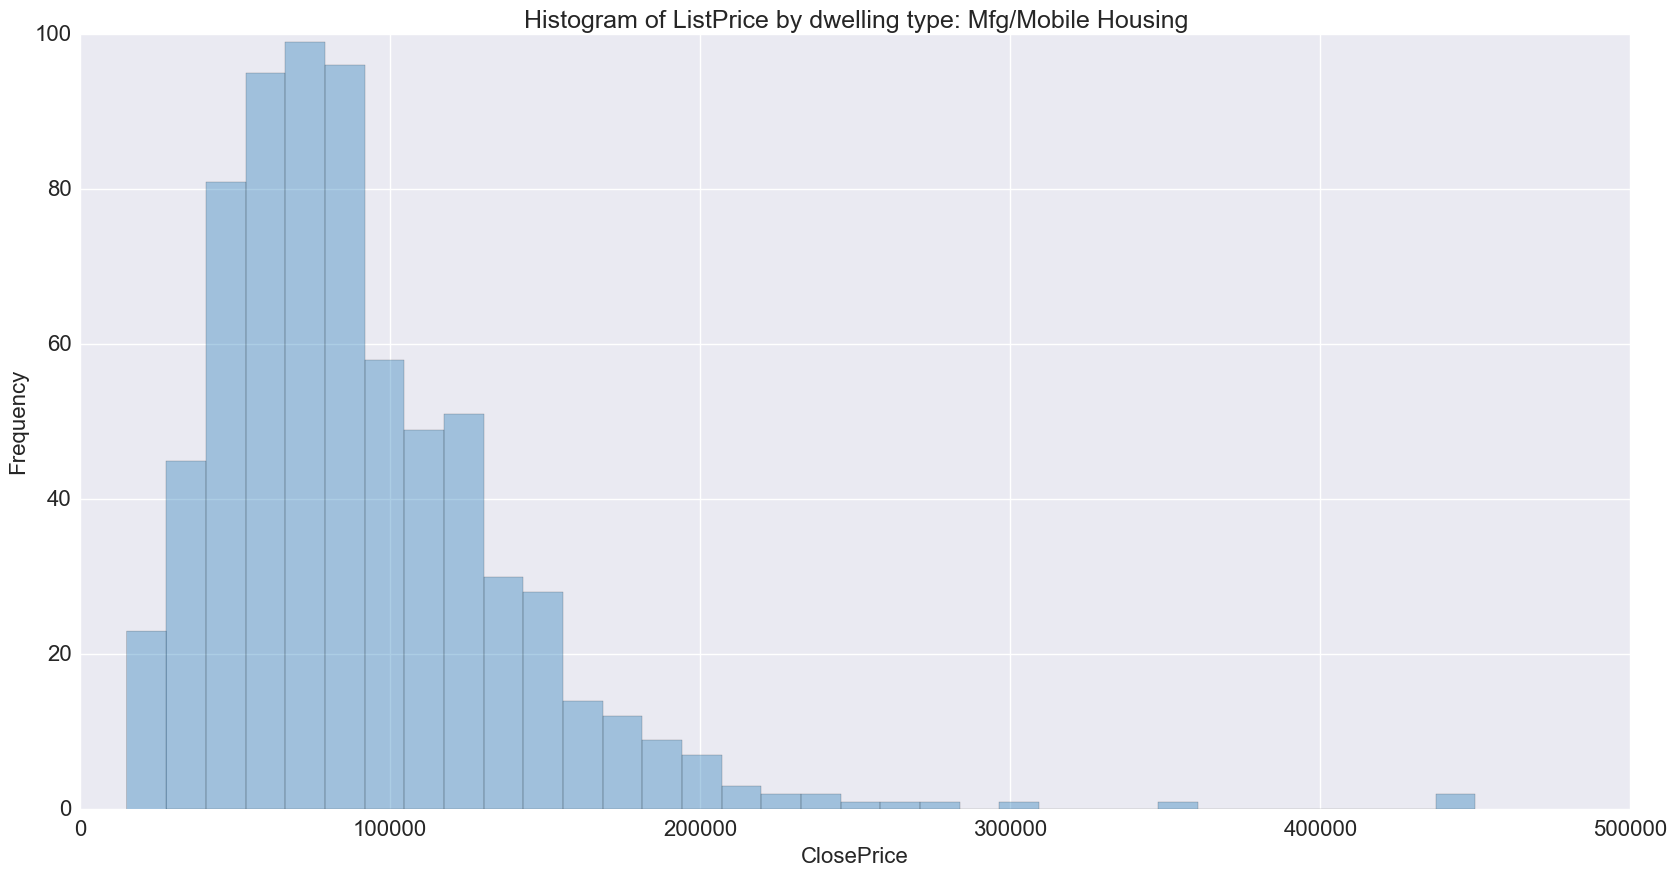

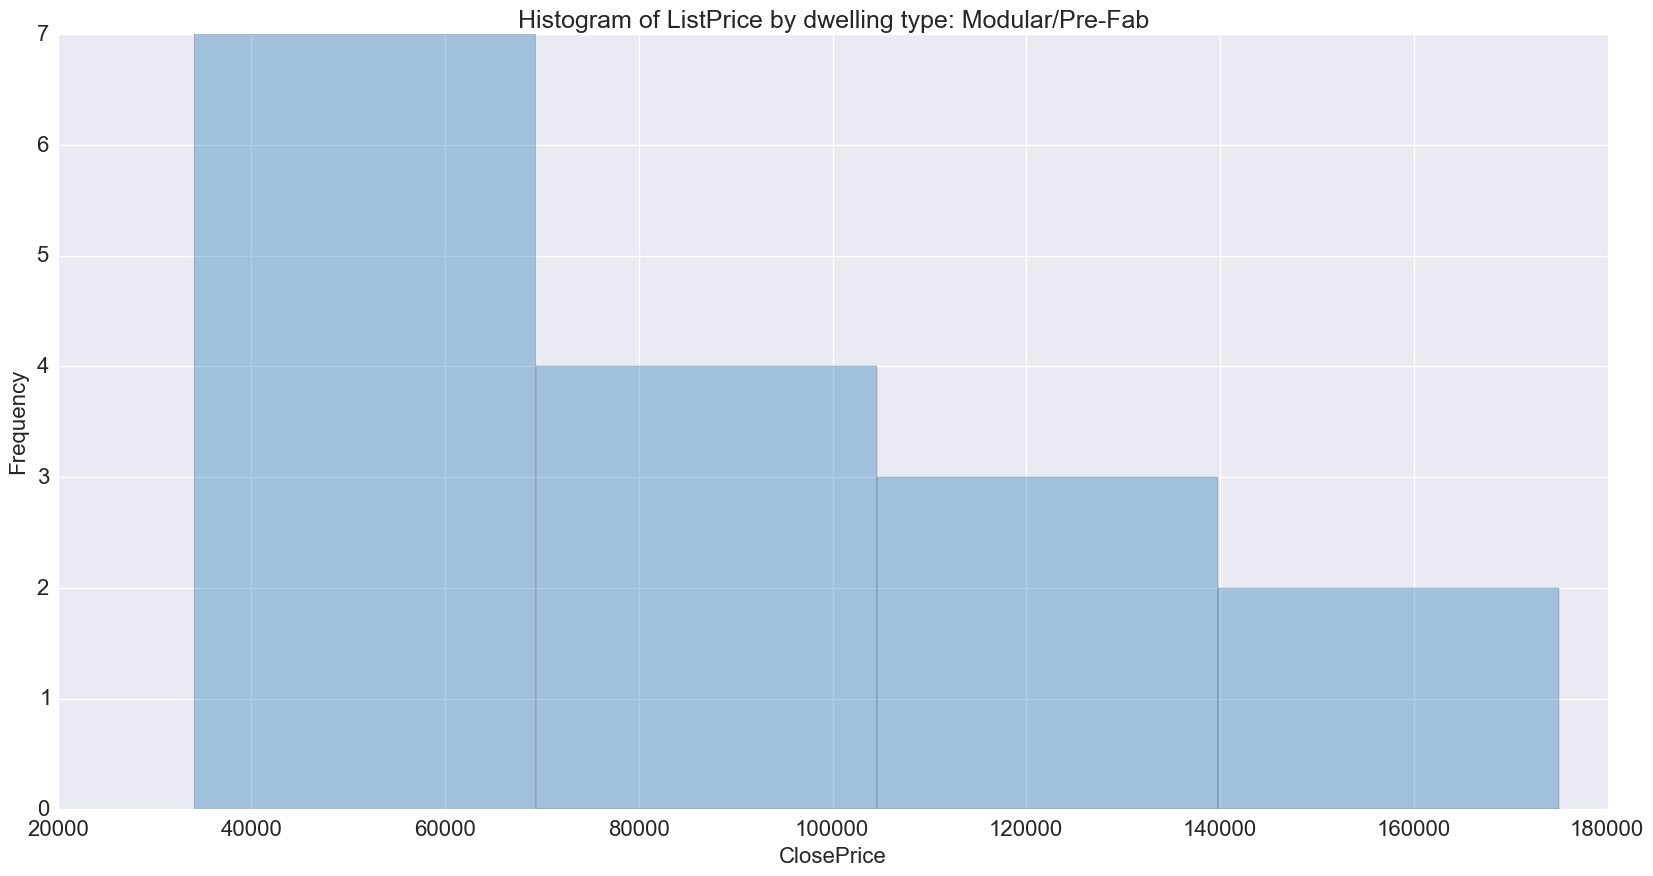

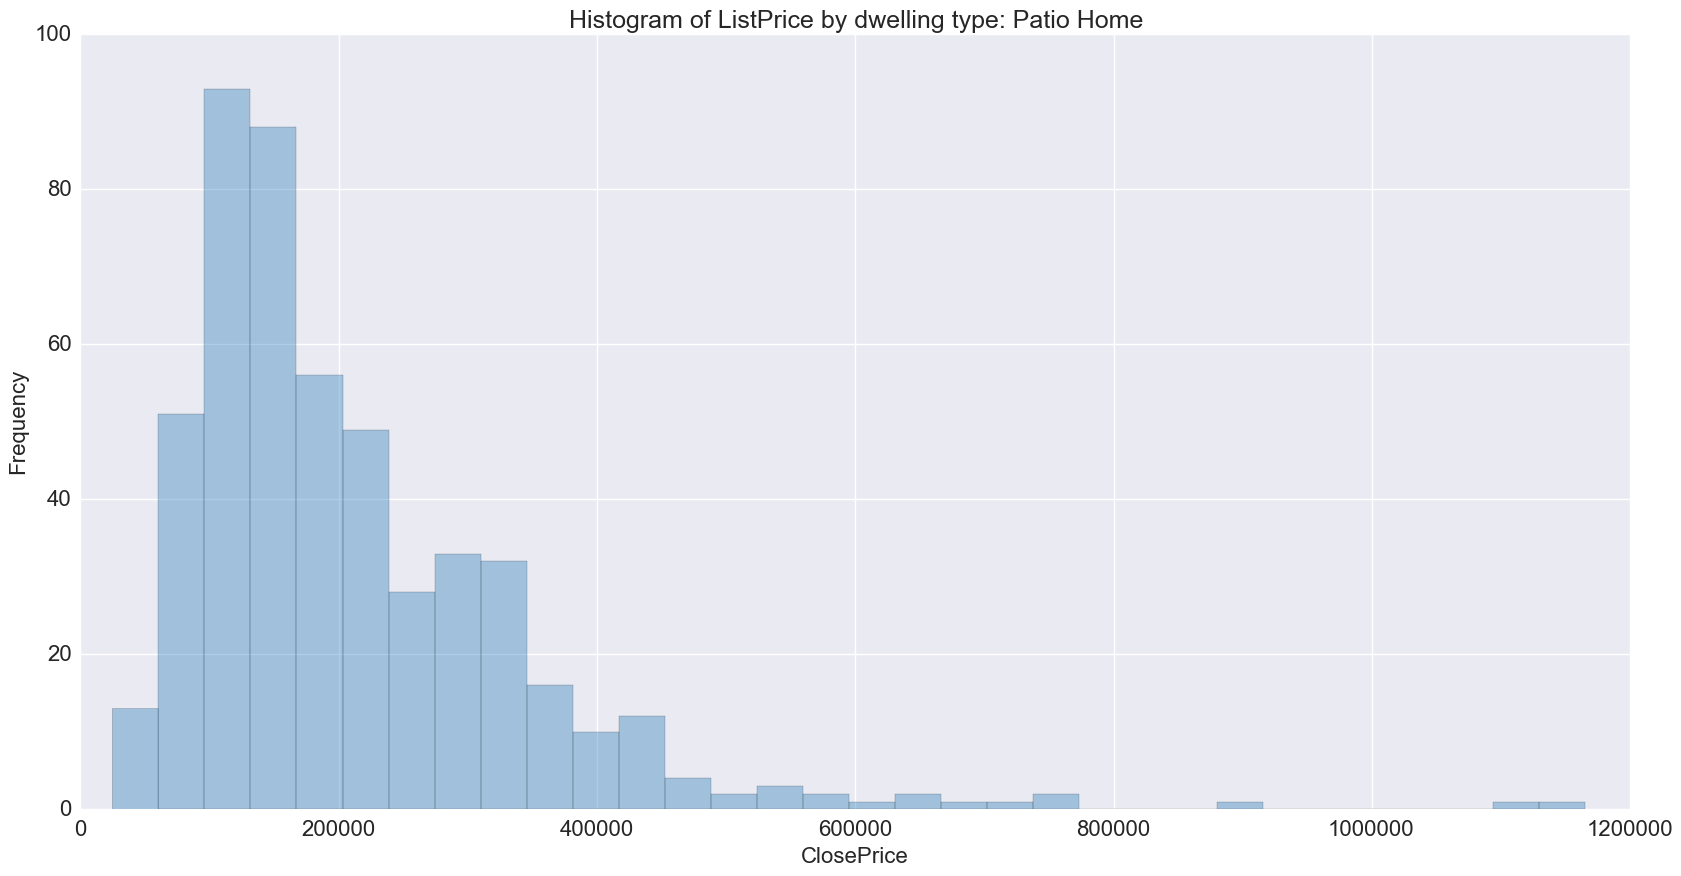

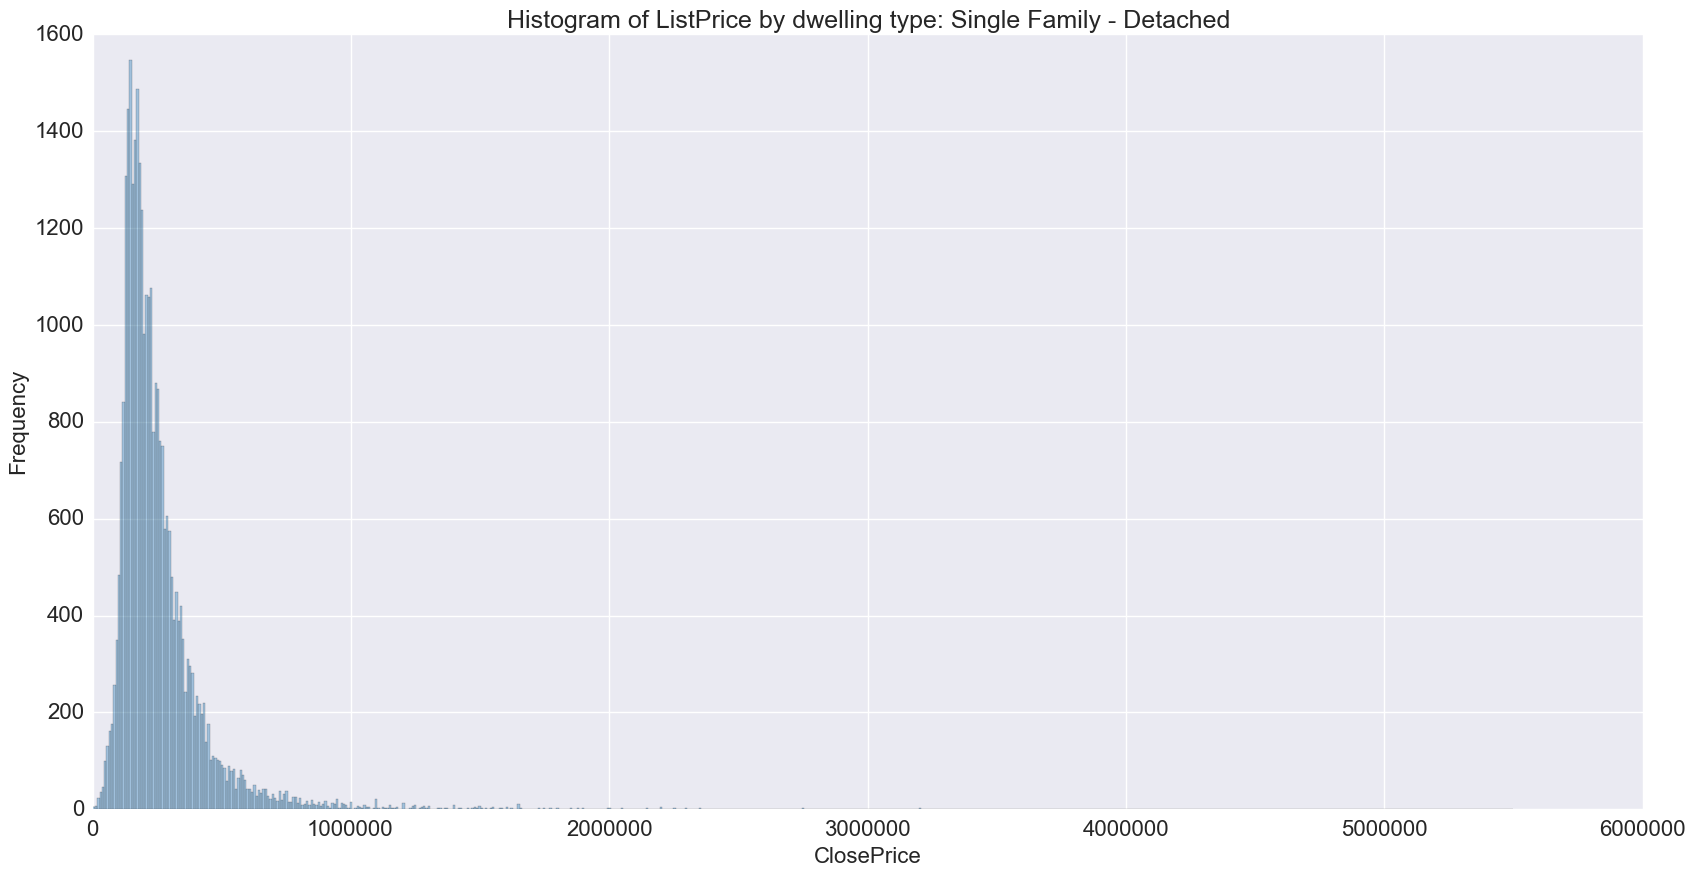

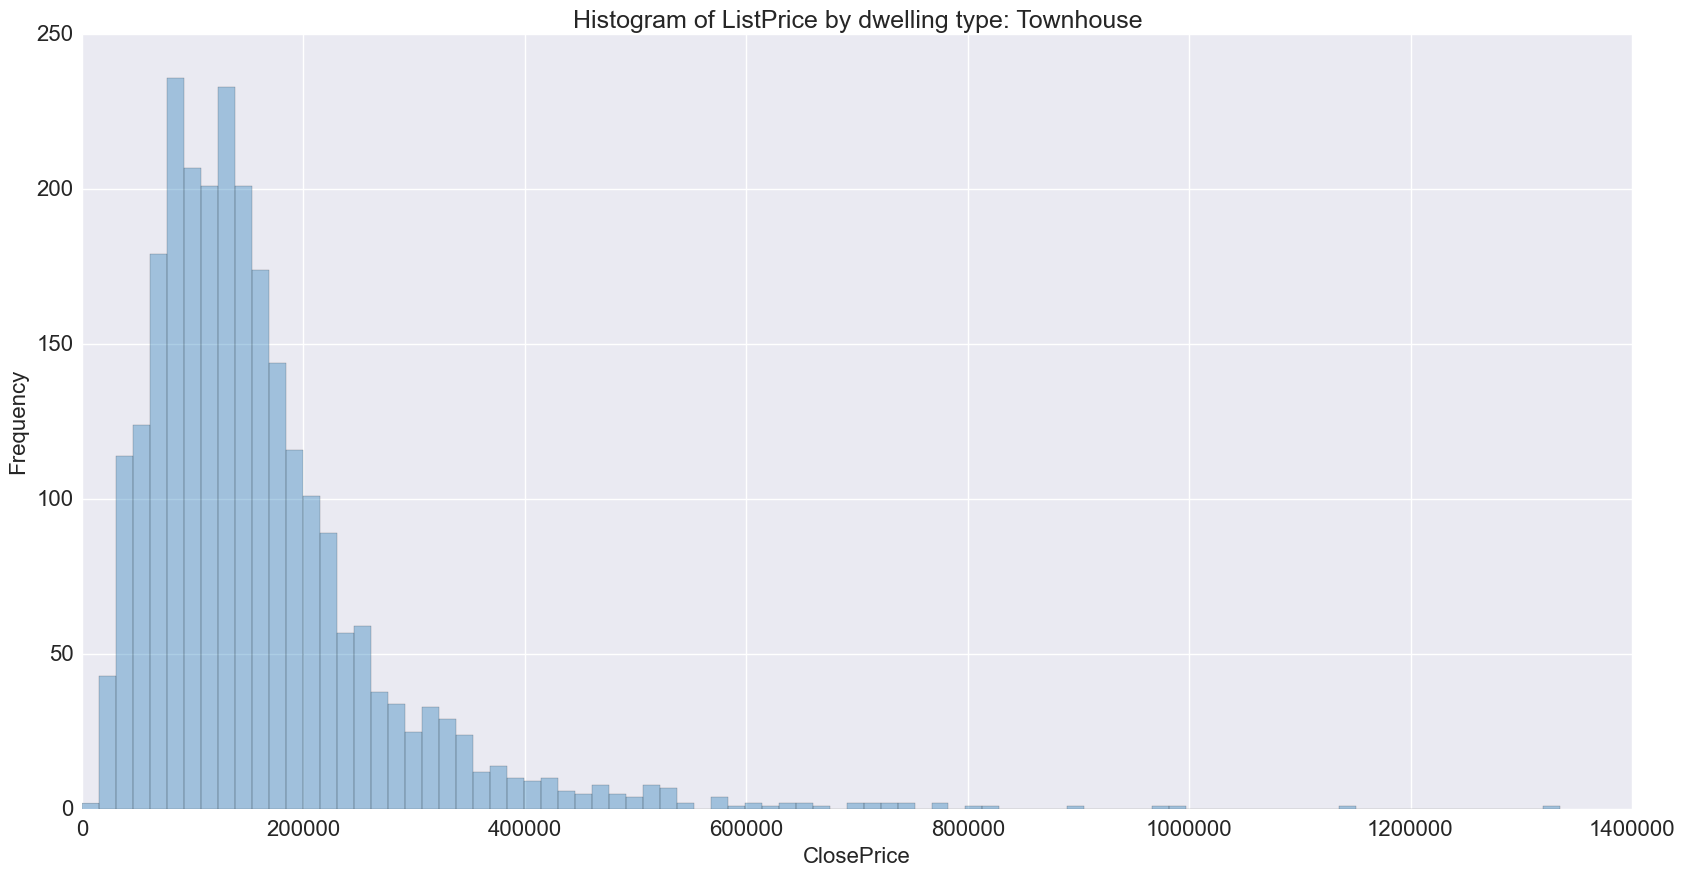

In [159]:
# Check ClosePrice by dwelling type
for dwelling_type in dwelling_types:
    temp_df = df[df['DwellingType'] == dwelling_type]
    plt.figure(figsize = (20, 10))
    sns.distplot(temp_df['ClosePrice'].dropna(), kde = False, rug = False, color =  '#3182bd')
    plt.xlabel('ClosePrice', fontsize = 16)
    plt.ylabel('Frequency', fontsize = 16)
    plt.tick_params(axis = 'both', which = 'major', labelsize = 16)
    plt.title('Histogram of ListPrice by dwelling type: ' + dwelling_type, fontsize = 18)

In [160]:
for dwelling_type in dwelling_types:
    temp_df = df[df['DwellingType'] == dwelling_type]['ClosePrice']
    min_val = temp_df.min()
    max_val = temp_df.max()
    print 'Dwelling type: ' + dwelling_type + ', min close price: {} and max close price: {}'.format(min_val, max_val)

Dwelling type: Apartment Style/Flat, min close price: 13000.0 and max close price: 1975000.0
Dwelling type: Gemini/Twin Home, min close price: 35000.0 and max close price: 525000.0
Dwelling type: Loft Style, min close price: 46000.0 and max close price: 980000.0
Dwelling type: Mfg/Mobile Housing, min close price: 15000.0 and max close price: 450000.0
Dwelling type: Modular/Pre-Fab, min close price: 34100.0 and max close price: 175000.0
Dwelling type: Patio Home, min close price: 24900.0 and max close price: 1165000.0
Dwelling type: Single Family - Detached, min close price: 1.0 and max close price: 5500000.0
Dwelling type: Townhouse, min close price: 1.0 and max close price: 1335000.0


**Note:** 
- Living Area Outliers: <font color=red>Need to remove datapoints where ClosePrice is equal to $1.0</font>

In [161]:
df = df[df['ClosePrice'] >= 1.0]
del df['NumBaths']
df.head(3)

,LivingArea,NumBedrooms,Pool,ClosePrice,DwellingType,num_baths
1,2230.0,4,Private,460000.0,Single Family - Detached,2.0
2,1601.0,3,Private,279900.0,Single Family - Detached,2.0
3,2440.0,4,None,228000.0,Single Family - Detached,2.5


In [162]:
df.to_csv('data/clean_data.csv', index=False)

**Transform Categorical variables to Binary variables: Dummy Variables**

In [163]:
# Columns
pool_cols = ['pool_both', 'pool_community', 'pool_private', 'pool_none']
dwelling_cols = ['apt', 'twin', 'loft', 'mobile', 'modular', 'patio', 'single', 'townhouse']
bed_cols = ['bed_0', 'bed_1', 'bed_2', 'bed_3', 'bed_4', 'bed_5', 'bed_6', 'bed_7', 'bed_8']
bath_cols = ['bath_0', 'bath_1', 'bath_1.5', 'bath_2', 'bath_2.5', 'bath_3', 'bath_3.5', 'bath_4', 
             'bath_4.5', 'bath_5', 'bath_5.5', 'bath_6', 'bath_6.5', 'bath_7', 'bath_7.5', 'bath_8']

In [164]:
# Create dummy variables: One hot encoding
pool_dummies = pd.get_dummies(df['Pool']).astype(int)
pool_dummies.columns = pool_cols
dwelling_dummies = pd.get_dummies(df['DwellingType']).astype(int)
dwelling_dummies.columns = dwelling_cols
bath_dummies = pd.get_dummies(df['num_baths']).astype(int)
bath_dummies.columns = bath_cols
bed_dummies = pd.get_dummies(df['NumBedrooms']).astype(int)
bed_dummies.columns = bed_cols
temp = pd.concat([bed_dummies, bath_dummies, pool_dummies, dwelling_dummies], axis=1)
temp['area'] = df['LivingArea']
temp['price'] = df['ClosePrice']
temp.head(3)

,bed_0,bed_1,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,bath_0,...,apt,twin,loft,mobile,modular,patio,single,townhouse,area,price
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,2230.0,460000.0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1601.0,279900.0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,2440.0,228000.0


In [165]:
# Drom 1 column from each categorical variable to avoid multi-collinearity
drop_cols = ['bed_0', 'bath_0', 'pool_both', 'modular']
data = temp.drop(drop_cols, axis=1)
print data.shape
data.head(3)

(37820, 35)


,bed_1,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,bath_1,bath_1.5,...,pool_none,apt,twin,loft,mobile,patio,single,townhouse,area,price
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,2230.0,460000.0
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1601.0,279900.0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,2440.0,228000.0


In [166]:
print list(data.columns[:34])

['bed_1', 'bed_2', 'bed_3', 'bed_4', 'bed_5', 'bed_6', 'bed_7', 'bed_8', 'bath_1', 'bath_1.5', 'bath_2', 'bath_2.5', 'bath_3', 'bath_3.5', 'bath_4', 'bath_4.5', 'bath_5', 'bath_5.5', 'bath_6', 'bath_6.5', 'bath_7', 'bath_7.5', 'bath_8', 'pool_community', 'pool_private', 'pool_none', 'apt', 'twin', 'loft', 'mobile', 'patio', 'single', 'townhouse', 'area']


### Neural Network
- NOTE: Standardize Area 
- [Blog post](http://briandolhansky.com/blog/artificial-neural-networks-linear-regression-part-1)
- [Back prop](http://briandolhansky.com/blog/2013/9/27/artificial-neural-networks-backpropagation-part-4)

In [33]:
# Neural Network for Regression: Development
input_size = 4 
hidden_size = 10
num_classes = 1
num_inputs = 5
std = 1e-4
output_size = num_classes

# Toy data
def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

X, y = init_toy_data()
loss = None
reg = 0

params = {}
params['W1'] = std * np.random.randn(input_size, hidden_size)
params['b1'] = np.zeros(hidden_size)
params['W2'] = std * np.random.randn(hidden_size)
params['b2'] = np.zeros(output_size)

# Unpack variables from the params dictionary
W1, b1 = params['W1'], params['b1']
W2, b2 = params['W2'], params['b2']
N, D = X.shape

# Activation function: ReLU
f = lambda x: np.maximum(0, x)

# First hidden layer: activation
a1 = np.dot(X, W1) + b1
# First hidden layer: transformation
z1 = f(a1)

# Output layer: activation
a2 = np.dot(z1, W2) + b2

# Loss
data_loss = 0.5 * np.sum((a2.ravel()-y)**2)
data_loss /= N
reg_loss = 0.5 * reg * np.sum(W1 * W1) + 0.5 * reg * np.sum(W2 * W2) 
loss = data_loss + reg_loss

# ---- BACKWARD PASS ---- #
# Gradient
grads = {}

# δ2_k
d2 = a2.ravel() - y # δ2_k = a_k - y_k
d2 /= N

# ∂E/∂w_kj = δ2_k.z1_j
dW2 = np.dot(d2, z1)

# ∂E/∂b_k = ∑_n(δ2_k)_n
db2 = np.array([np.sum(d2)])

# δ1_j
W2_dot_d2 = np.outer(W2.ravel(), d2)
i1 = (a1 > 0).astype(int)
d1 = i1.T * W2_dot_d2 # i1 * W2.d2

# ∂E/∂w_ji = x'_i.δ'1_j
dW1 = np.dot(X.T, d1.T)

# ∂E/∂b_j = ∑_n(δ1_j)_n
db1 = np.sum(d1, axis=1)

# Regularization gradient
dW2 += reg * W2.ravel()
dW1 += reg * W1

# # Check shapes
assert db2.shape == b2.shape
assert dW2.shape == W2.shape
assert db1.shape == b1.shape
assert dW1.shape == W1.shape

print W1.shape, b1.shape, W2.shape, b2.shape
print dW1.shape, db1.shape, dW2.shape, db2.shape

# Gradients
grads['W2'] = dW2
grads['W1'] = dW1
grads['b1'] = db1
grads['b2'] = db2

print grads

(4, 10) (10,) (10,) (1,)
(4, 10) (10,) (10,) (1,)
{'b2': array([-1.19999965]), 'W2': array([ -2.37135673e-04,  -1.24636710e-04,  -1.22680299e-03,
        -3.63685357e-03,  -1.06295540e-03,  -8.88029121e-05,
        -7.31742893e-04,  -1.38441506e-03,   0.00000000e+00,
         0.00000000e+00]), 'W1': array([[  7.26403315e-06,  -2.16847943e-04,  -8.80854252e-05,
          4.09115543e-05,  -6.70463505e-05,  -2.60613853e-06,
         -1.56839062e-04,  -2.08586565e-04,   0.00000000e+00,
          0.00000000e+00],
       [ -5.95597803e-04,   5.76704456e-04,   3.66066343e-04,
         -2.65078726e-04,   4.34414224e-04,  -1.32682505e-05,
          7.19579483e-04,   1.35149555e-03,   0.00000000e+00,
          0.00000000e+00],
       [  6.11750810e-04,  -4.37203632e-04,  -7.11594243e-04,
          4.16064808e-04,  -6.81852044e-04,   6.38032914e-07,
         -4.04449871e-04,  -2.12129306e-03,   0.00000000e+00,
          0.00000000e+00],
       [ -3.58817860e-04,   1.90738091e-04,   7.26438827e-04

### Neural Network For Regression

In [34]:
import numpy as np

# Modified cs231n assignment-1 neural network code
class TwoLayerNetRegression(object): 
    """
    A two layer neural network for regression. The network has input dimension 
    of N, a hidden layer dimension of H and performs regression. The network
    is trained with a square loss function and L2 regularization on weight
    matrices. 
    
    Network architecture:
    input - fully connected layer - ReLu - connected layer - output (a number)
    """
    
    def __init__(self, input_size, hidden_size, std=1e-4):
        """
        Initialize the model. Weights are initialized to small random values and
        biases are initialized to zero. Weights and biases are stored in the
        variable self.params, which is a dictionary with the following keys:

        W1: First layer weights; has shape (D, H)
        b1: First layer biases; has shape (H,)
        W2: Second layer weights; has shape (H,)
        b2: Second layer biases; has shape (1,)

        Inputs:
        - input_size: The dimension D of the input data.
        - hidden_size: The number of neurons H in the hidden layer.
        """
        self.params = {}
        self.params['W1'] = std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = std * np.random.randn(hidden_size)
        self.params['b2'] = np.zeros(1)
        
    def loss(self, X, y=None, reg=0.0):
        """
        Compute the loss and gradients for a two layer regression neural network.

        Inputs:
        - X: Input data of shape (N, D). Each X[i] is a training sample.
        - y: Vector of training values. This parameter is optional; if it
          is not passed then return values, and if it is passed then instead 
          return the loss and gradients.
        - reg: Regularization strength.

        Returns:
        If y is None, return a vector values of shape (N) where values[i] is
        the value on input X[i].

        If y is not None, instead return a tuple of:
        - loss: Loss (data loss and regularization loss) for this batch of training
          samples.
        - grads: Dictionary mapping parameter names to gradients of those parameters
          with respect to the loss function; has the same keys as self.params.
        """
        # Unpack variables from the params dictionary
        W1, b1 = self.params['W1'], self.params['b1']
        W2, b2 = self.params['W2'], self.params['b2']
        N, D = X.shape
        
        # ---- FORWARD PASS ---- #
        values = None
        
        # Activation function: ReLU
        f = lambda x: np.maximum(0, x)

        # First hidden layer: activation
        a1 = np.dot(X, W1) + b1
        
        # First hidden layer: transformation
        z1 = f(a1)

        # Output layer: activation
        a2 = np.dot(z1, W2) + b2
        values = a2
        
        # If the targets are not given then jump out
        if y is None:
            return values
        
        # Loss = Data loss + Regularization loss
        # Data loss
        data_loss = 0.5 * np.sum((a2.ravel()-y)**2)
        data_loss /= N
        
        # Regularization loss
        reg_loss = 0.5 * reg * np.sum(W1 * W1) + 0.5 * reg * np.sum(W2 * W2) 
        loss = data_loss + reg_loss
        
        # ---- BACKWARD PASS ---- #
        # Gradient
        grads = {}

        # δ2_k
        d2 = a2 - y # δ2_k = a_k - y_k
        d2 /= N

        # ∂E/∂w_kj = δ2_k.z1_j
        dW2 = np.dot(d2, z1)

        # ∂E/∂b_k = ∑_n(δ2_k)_n
        db2 = np.array([np.sum(d2)])

        # δ1_j
        W2_dot_d2 = np.outer(W2, d2)
        i1 = (a1 > 0).astype(int)
        d1 = i1.T * W2_dot_d2 # i1 * W2.d2

        # ∂E/∂w_ji = x'_i.δ'1_j
        dW1 = np.dot(X.T, d1.T)

        # ∂E/∂b_j = ∑_n(δ1_j)_n
        db1 = np.sum(d1, axis=1)

        # Regularization gradient
        dW2 += reg * W2
        dW1 += reg * W1

        # Check shapes
        assert db2.shape == b2.shape
        assert dW2.shape == W2.shape
        assert db1.shape == b1.shape
        assert dW1.shape == W1.shape

        # Gradients
        grads['W2'] = dW2
        grads['W1'] = dW1
        grads['b1'] = db1
        grads['b2'] = db2
        
        return loss, grads
    
    def train(self, X, y, X_val, y_val, learning_rate=1e-3,
              learning_rate_decay=0.95, reg=1e-5, num_iters=100,
              batch_size=200, verbose=False):
        """
        Train neural network for regression using stochastic gradient descent.
        
        Inputs:
        - X: A numpy array of shape (N, D) giving training data.
        - y: A numpy array of shape (N,) giving training targets.
        - X_val: A numpy array of shape (N_val, D) giving validation data.
        - y_val: A numpy array of shape (N_val,) giving validation target.
        - learning_rate: Scalar giving learning rate for optimization.
        - learning_rate_decay: Scalar giving factor used to decay the learning rate
          after each epoch.
        - reg: Scalar giving regularization strength.
        - num_iters: Number of steps to take when optimizing.
        - batch_size: Number of training examples to use per step.
        - verbose: boolean; if true print progress during optimization.
        """
        num_train = X.shape[0]
        iterations_per_epoch = max(num_train/batch_size, 1)
        
        # Use SGD to optimize the parameters in self.model
        loss_history = []
        train_error_history = []
        val_error_history = []
        
        for it in xrange(num_iters):
            idx = np.random.choice(xrange(num_train), batch_size, replace=True)
            X_batch = X[idx,:]
            y_batch = y[idx]
            
            # Compute loss and gradients using the current minibatch
            loss, grads = self.loss(X_batch, y=y_batch, reg=reg)
            loss_history.append(loss)
            
            # param -= learning_rate * grad_param
            self.params['b2'] -= learning_rate * grads['b2']
            self.params['W2'] -= learning_rate * grads['W2']
            self.params['b1'] -= learning_rate * grads['b1']
            self.params['W1'] -= learning_rate * grads['W1']
            
            if verbose and it % 100 == 0:
                print 'Iteration {}/{}: loss {}'.format(it, num_iters, loss)
                
            # Every epoch, check train and val accuracy and decay learning rate.
            if it % iterations_per_epoch == 0:
                # Check error
                train_error = ((self.predict(X_batch) - y_batch)**2).mean()
                val_error = ((self.predict(X_val) - y_val)**2).mean()
                train_error_history.append(train_error)
                val_error_history.append(val_error)
                
                # Decay learning rate: SGD with momentum
                learning_rate *= learning_rate_decay
        return {
            'loss_history': loss_history,
            'train_error_history': train_error_history,
            'val_error_history': val_error_history
        }
    
    def predict(self, X):
        """
        Use the trained weights of this two-layer network to predict values for
        data points. 
        
        Inputs:
        - X: A numpy array of shape (N, D) giving N D-dimensional data points to
          predict y.
          
        Returns:
        - y_pred: A numpy array of shape (N,) giving predicted labels for each of
          the elements of X. 
        """
        # Unpack variables from the params dictionary
        W1, b1 = self.params['W1'], self.params['b1']
        W2, b2 = self.params['W2'], self.params['b2']
        
        # ---- FORWARD PASS ---- #
        # Activation function: ReLU
        f = lambda x: np.maximum(0, x)

        # First hidden layer: activation
        a1 = np.dot(X, W1) + b1
        
        # First hidden layer: transformation
        z1 = f(a1)

        # Output layer: activation
        a2 = np.dot(z1, W2) + b2
        y_pred = a2
        
        return y_pred

In [35]:
# Neural Network for Regression: Testing
input_size = 40 
hidden_size = 10
num_inputs = 50000

# Toy data
def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = 10000 * np.random.randn(num_inputs)
    return X, y

X, y = init_toy_data()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

net = TwoLayerNetRegression(input_size, hidden_size)

# Train the network
stats = net.train(X_train, y_train, X_test, y_test,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.5, verbose=True)

Iteration 0/1000: loss 48899789.5808
Iteration 100/1000: loss nan
Iteration 200/1000: loss nan
Iteration 300/1000: loss nan
Iteration 400/1000: loss nan
Iteration 500/1000: loss nan
Iteration 600/1000: loss nan
Iteration 700/1000: loss nan
Iteration 800/1000: loss nan
Iteration 900/1000: loss nan


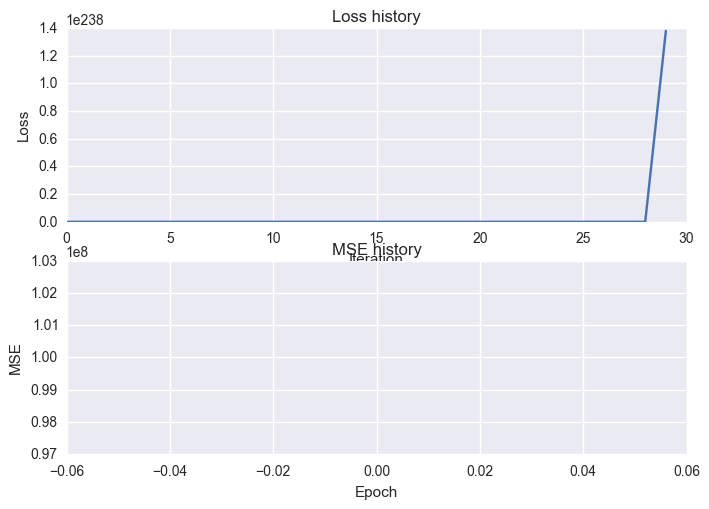

In [36]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_error_history'], label='train')
plt.plot(stats['val_error_history'], label='val')
plt.title('MSE history')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

#### Prepare data and split

In [37]:
# Create X and y from Pandas dataframe
X = data.values[:,:34]
print X.shape
y = data.values[:,34:]
y = y.ravel()
print y.shape

(37820, 34)
(37820,)


In [38]:
# Training, validation and Testing data
from sklearn.model_selection import train_test_split
X_T, X_test, y_T, y_test = train_test_split(X, y, test_size=0.25, random_state=15)
X_train, X_val, y_train, y_val = train_test_split(X_T, y_T, test_size=0.05, random_state=15)
print X_train.shape
print X_val.shape
print X_test.shape
print y_train.shape
print y_val.shape
print y_test.shape

(26946, 34)
(1419, 34)
(9455, 34)
(26946,)
(1419,)
(9455,)


In [39]:
# Normalize data
train_mean_area = X_train[:, X_train.shape[1]-1:].mean()
train_std_area = X_train[:, X_train.shape[1]-1:].std()

print 'Train Mean Area: ', train_mean_area
print 'Train Std Area: ', train_std_area

# Normalize area column
X_train[:, X_train.shape[1]-1:] = (X_train[:, X_train.shape[1]-1:]-train_mean_area)/train_std_area
X_val[:, X_val.shape[1]-1:] = (X_val[:, X_val.shape[1]-1:]-train_mean_area)/train_std_area
X_test[:, X_test.shape[1]-1:] = (X_test[:, X_test.shape[1]-1:]-train_mean_area)/train_std_area

Train Mean Area:  1936.54447784
Train Std Area:  802.971576322


In [40]:
# Neural Network for Regression: Development
input_size = X_train.shape[1]
hidden_size = 100
std = 1e-4
loss = None
reg = 0

print 'Input size: ', input_size
print 'Hidden size: ', hidden_size

params = {}
params['W1'] = std * np.random.randn(input_size, hidden_size)
params['b1'] = np.zeros(hidden_size)
params['W2'] = std * np.random.randn(hidden_size)
params['b2'] = np.zeros(output_size)

# Unpack variables from the params dictionary
W1, b1 = params['W1'], params['b1']
W2, b2 = params['W2'], params['b2']
N, D = X_train.shape

print 'W1 shape: ', W1.shape
print 'b1 shape: ', b1.shape
print 'W2 shape: ', W2.shape
print 'b2 shape: ', b2.shape

# Activation function: ReLU
f = lambda x: np.maximum(0, x)

# First hidden layer: activation
a1 = np.dot(X_train, W1) + b1
print 'a1 shape: ', a1.shape

# First hidden layer: transformation
z1 = f(a1)
print 'z1 shape: ', z1.shape

# Output layer: activation
a2 = np.dot(z1, W2) + b2
print 'a2 shape: ', a2.shape

# Loss
data_loss = 0.5 * np.sum((a2-y_train)**2)
data_loss /= N
reg_loss = 0.5 * reg * np.sum(W1 * W1) + 0.5 * reg * np.sum(W2 * W2) 
loss = data_loss + reg_loss
print 'loss: ', loss

# ---- BACKWARD PASS ---- #
# Gradient
grads = {}

# δ2_k
d2 = a2 - y_train # δ2_k = a_k - y_k
d2 /= N
print 'd2 shape: ', d2.shape

# ∂E/∂w_kj = δ2_k.z1_j
dW2 = np.dot(d2, z1)
print 'dW2 shape: ', dW2.shape

# ∂E/∂b_k = ∑_n(δ2_k)_n
db2 = np.array([np.sum(d2)])
print 'db2 shape: ', db2.shape

# δ1_j
W2_dot_d2 = np.outer(W2, d2)
i1 = (a1 > 0).astype(int)
d1 = i1.T * W2_dot_d2 # i1 * W2.d2
print 'd1 shape: ', d1.shape

# ∂E/∂w_ji = x'_i.δ'1_j
dW1 = np.dot(X_train.T, d1.T)
print 'dW1 shape: ', dW1.shape

# ∂E/∂b_j = ∑_n(δ1_j)_n
db1 = np.sum(d1, axis=1)
print 'db1 shape: ', db1.shape

# Regularization gradient
dW2 += reg * W2
dW1 += reg * W1

# Check shapes
assert db2.shape == b2.shape
assert dW2.shape == W2.shape
assert db1.shape == b1.shape
assert dW1.shape == W1.shape

# Gradients
grads['W2'] = dW2
grads['W1'] = dW1
grads['b1'] = db1
grads['b2'] = db2

Input size:  34
Hidden size:  100
W1 shape:  (34, 100)
b1 shape:  (100,)
W2 shape:  (100,)
b2 shape:  (1,)
a1 shape:  (26946, 100)
z1 shape:  (26946, 100)
a2 shape:  (26946,)
loss:  48901821336.2
d2 shape:  (26946,)
dW2 shape:  (100,)
db2 shape:  (1,)
d1 shape:  (100, 26946)
dW1 shape:  (34, 100)
db1 shape:  (100,)


#### Hyperparameter Tuning

In [41]:
best_net = None # store the best model into this 

# Generate hyperparameters randomly
def random_hyperparams():
    
    # Lambda function to select hyperparameter randomly
    random = lambda x: np.random.choice(x, 1)[0]
    
    # Hyperparameter values
    hyperparams = {
        'hidden_size': np.arange(25, 525, 25),
        'batch_size': np.arange(100, 1050, 50),
        'learning_rate': 10.0**np.arange(-3, 4),
        'learning_rate_decay': np.arange(0.75, 1.25, 0.05),
        'reg': 10.0**np.arange(-5,6),
        'num_iters': np.arange(100, 1050, 50)
    }
    
    temp = {hyperparam: random(values) for hyperparam, values in hyperparams.iteritems()}
    return temp


best_rmse = np.inf  
best_hyperparams = None

for i in xrange(3):
    # Randomly generate hyperparameters
    params = random_hyperparams()
    print params
    
    # Neural Network
    input_size = X.shape[1]
    hidden_size = params['hidden_size']
    net = TwoLayerNetRegression(input_size, hidden_size)

    # Train the network
    stats = net.train(X_train, y_train, X_val, y_val, 
                      num_iters=params['num_iters'], 
                      batch_size=params['batch_size'],
                      learning_rate=params['learning_rate'], 
                      learning_rate_decay=params['learning_rate_decay'],
                      reg=params['reg'], verbose=False)

    # Predict on the validation set
    val_rmse = np.sqrt(np.mean((net.predict(X_val) - y_val)**2))
    print 'Validation RMSE: ', val_rmse
    # Best accuracy, network and parameters
    if val_rmse < best_rmse:
        best_rmse = val_rmse
        best_net = net
        best_hyperparams = params
        print 'Best RMSE (after {} iterations) is {}'.format(i, best_rmse)

{'num_iters': 500, 'learning_rate': 10.0, 'batch_size': 550, 'hidden_size': 300, 'reg': 10.0, 'learning_rate_decay': 0.90000000000000013}
Validation RMSE:  nan
{'num_iters': 700, 'learning_rate': 100.0, 'batch_size': 800, 'hidden_size': 75, 'reg': 1000.0, 'learning_rate_decay': 1.2000000000000004}
Validation RMSE:  nan
{'num_iters': 300, 'learning_rate': 0.10000000000000001, 'batch_size': 200, 'hidden_size': 400, 'reg': 1.0000000000000001e-05, 'learning_rate_decay': 1.0500000000000003}
Validation RMSE:  nan


In [42]:
# Train the network
net = TwoLayerNetRegression(X_train.shape[1], 10)
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=500, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.5, verbose=True)

Iteration 0/500: loss 49746515532.1
Iteration 100/500: loss nan
Iteration 200/500: loss nan
Iteration 300/500: loss nan
Iteration 400/500: loss nan


#### Loss Increasing Exponentially?
- Not sure why this is happening. Code seem to be correct, try debugging next week. 
- **Linear Regression**

In [43]:
import numpy as np

class LinearRegression(object): 
    """
    A linear regression implementation. It is trained with a square loss function 
    and L2 regularization on weight matrices. 
    """
    
    def __init__(self, input_size, std=1e-4):
        """
        Initialize the model. Weights are initialized to small random values and
        biases are initialized to zero. Weights and biases are stored in the
        variable self.params, which is a dictionary with the following keys:

        W: First layer weights; has shape (D)
        b: First layer biases; has shape (1)


        Inputs:
        - input_size: The dimension D of the input data.
        """
        self.params = {}
        self.params['W'] = std * np.random.randn(input_size)
        self.params['b'] = np.zeros(1)
        
    def loss(self, X, y, reg=0.0):
        """
        Compute the loss and gradients for linear regression model.

        Inputs:
        - X: Input data of shape (N, D). Each X[i] is a training sample.
        - y: Vector of training values. This parameter is optional; if it
          is not passed then return values, and if it is passed then instead 
          return the loss and gradients.
        - reg: Regularization strength.

        Returns:
        - loss: Loss (data loss and regularization loss) for this batch of training
          samples.
        - grads: Dictionary mapping parameter names to gradients of those parameters
          with respect to the loss function; has the same keys as self.params.
        """
        # Unpack variables from the params dictionary
        W, b = self.params['W'], self.params['b']
        N, D = X.shape
        
        y_hat = np.dot(X, W) + b

        # Loss = Data loss + Regularization loss
        # Data loss
        data_loss = 0.5 * np.sum((y_hat-y)**2)
        data_loss /= N
        
        # Regularization loss
        reg_loss = 0.5 * reg * np.sum(W * W)
        loss = data_loss + reg_loss
        
        # Gradient
        grads = {}

        # δ
        d = y_hat - y # δ = y_hat - y
        d /= N

        # ∂E/∂w = δ.x
        dW = np.dot(d, X)

        # ∂E/∂b = ∑_n(δ)_n
        db = np.array([np.sum(d)])

        # Regularization gradient
        dW += reg * W

        # Check shapes
        assert db.shape == b.shape
        assert dW.shape == W.shape

        # Gradients
        grads['W'] = dW
        grads['b'] = db
        
        return loss, grads
    
    def train(self, X, y, X_val, y_val, learning_rate=1e-3,
              learning_rate_decay=0.95, reg=1e-5, num_iters=100,
              batch_size=200, verbose=False):
        """
        Train linear regression model using stochastic gradient descent.
        
        Inputs:
        - X: A numpy array of shape (N, D) giving training data.
        - y: A numpy array of shape (N) giving training targets.
        - X_val: A numpy array of shape (N_val, D) giving validation data.
        - y_val: A numpy array of shape (N_val) giving validation target.
        - learning_rate: Scalar giving learning rate for optimization.
        - learning_rate_decay: Scalar giving factor used to decay the learning rate
          after each epoch.
        - reg: Scalar giving regularization strength.
        - num_iters: Number of steps to take when optimizing.
        - batch_size: Number of training examples to use per step.
        - verbose: boolean; if true print progress during optimization.
        """
        num_train = X.shape[0]
        iterations_per_epoch = max(num_train/batch_size, 1)
        
        # Use SGD to optimize the parameters in self.model
        loss_history = []
        train_error_history = []
        val_error_history = []
        
        for it in xrange(num_iters):
            idx = np.random.choice(xrange(num_train), batch_size, replace=True)
            X_batch = X[idx,:]
            y_batch = y[idx]
            
            # Compute loss and gradients using the current minibatch
            loss, grads = self.loss(X_batch, y=y_batch, reg=reg)
            loss_history.append(loss)
            
            # param -= learning_rate * grad_param
            self.params['b'] -= learning_rate * grads['b']
            self.params['W'] -= learning_rate * grads['W']
            
            if verbose and it % 100 == 0:
                print 'Iteration {}/{}: loss {}'.format(it, num_iters, loss)
                
            # Every epoch, check train and val accuracy and decay learning rate.
            if it % iterations_per_epoch == 0:
                # Check error
                train_error = ((self.predict(X_batch) - y_batch)**2).mean()
                val_error = ((self.predict(X_val) - y_val)**2).mean()
                train_error_history.append(train_error)
                val_error_history.append(val_error)
                
                # Decay learning rate: SGD with momentum
                learning_rate *= learning_rate_decay
        return {
            'loss_history': loss_history,
            'train_error_history': train_error_history,
            'val_error_history': val_error_history
        }
    
    def predict(self, X):
        """
        Use the trained weights of this linear regression model to predict values 
        for data points. 
        
        Inputs:
        - X: A numpy array of shape (N, D) giving N D-dimensional data points to
          predict y.
          
        Returns:
        - y_pred: A numpy array of shape (N,) giving predicted values for each of
          the elements of X. 
        """
        # Unpack variables from the params dictionary
        W, b = self.params['W'], self.params['b']
        
        # Predict
        y_pred = np.dot(X, W) + b
    
        return y_pred

In [44]:
best_linear = None # store the best model into this 

# Generate hyperparameters randomly
def random_hyperparams():
    
    # Lambda function to select hyperparameter randomly
    random = lambda x: np.random.choice(x, 1)[0]
    
    # Hyperparameter values
    hyperparams = {
        'batch_size': np.arange(100, 1050, 50),
        'learning_rate': 10.0**np.arange(-3, 4),
        'learning_rate_decay': np.arange(0.75, 1.25, 0.05),
        'reg': 10.0**np.arange(-5,6),
        'num_iters': np.arange(100, 1050, 50)
    }
    
    temp = {hyperparam: random(values) for hyperparam, values in hyperparams.iteritems()}
    return temp


best_rmse = np.inf  
best_hyperparams = None

for i in xrange(10):
    # Randomly generate hyperparameters
    params = random_hyperparams()
    
    # Linear Regression
    input_size = X.shape[1]
    linear = LinearRegression(input_size)

    # Train the network
    stats = linear.train(X_train, y_train, X_val, y_val, 
                      num_iters=params['num_iters'], 
                      batch_size=params['batch_size'],
                      learning_rate=params['learning_rate'], 
                      learning_rate_decay=params['learning_rate_decay'],
                      reg=params['reg'], verbose=False)

    # Predict on the validation set
    val_rmse = np.sqrt(np.mean((linear.predict(X_val) - y_val)**2))
    print 'Validation RMSE: ', val_rmse
    # Best accuracy, network and parameters
    if val_rmse < best_rmse:
        best_rmse = val_rmse
        best_linear = linear
        best_hyperparams = params
        print 'Best RMSE (after {} iterations) is {}'.format(i, best_rmse)

Validation RMSE:  inf
Validation RMSE:  nan
Validation RMSE:  nan
Validation RMSE:  216417.825425
Best RMSE (after 3 iterations) is 216417.825425
Validation RMSE:  nan
Validation RMSE:  nan
Validation RMSE:  nan
Validation RMSE:  nan
Validation RMSE:  175822.798695
Best RMSE (after 8 iterations) is 175822.798695
Validation RMSE:  120189.762411
Best RMSE (after 9 iterations) is 120189.762411


In [104]:
# Regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [105]:
# Create X and y from Pandas dataframe
X = data.values[:,:34]
print X.shape
y = data.values[:,34:]
y = y.ravel()
print y.shape

(37820, 34)
(37820,)


In [106]:
# Training, validation and Testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(28365, 34)
(9455, 34)
(28365,)
(9455,)


In [107]:
linear = LinearRegression(fit_intercept=True)
linear.fit(X_train, y_train)

# Error Metric: Mean Squared Error or Residual Sum of Squares
mse = np.mean((linear.predict(X_test) - y_test)**2)
print 'Residual sum of squares: {}'.format(mse)

# Error Metric: Root Mean Squared Error 
rmse = np.sqrt(np.mean((linear.predict(X_test) - y_test)**2))
print 'Root Mean Squared Error: {}'.format(rmse)

# Error Metric: Explained variance score or
ev = linear.score(X_test, y_test)
print 'Explained variance score: {}'.format(ev)

Residual sum of squares: 13007377594.9
Root Mean Squared Error: 114049.890815
Explained variance score: 0.622645190911


In [108]:
linear = Ridge(fit_intercept=True)
linear.fit(X_train, y_train)

# Error Metric: Mean Squared Error or Residual Sum of Squares
mse = np.mean((linear.predict(X_test) - y_test)**2)
print 'Residual sum of squares: {}'.format(mse)

# Error Metric: Root Mean Squared Error 
rmse = np.sqrt(np.mean((linear.predict(X_test) - y_test)**2))
print 'Root Mean Squared Error: {}'.format(rmse)

# Error Metric: Explained variance score or
ev = linear.score(X_test, y_test)
print 'Explained variance score: {}'.format(ev)

Residual sum of squares: 12817940572.8
Root Mean Squared Error: 113216.344106
Explained variance score: 0.628140915993


In [109]:
linear = Lasso(fit_intercept=True)
linear.fit(X_train, y_train)

# Error Metric: Mean Squared Error or Residual Sum of Squares
mse = np.mean((linear.predict(X_test) - y_test)**2)
print 'Residual sum of squares: {}'.format(mse)

# Error Metric: Root Mean Squared Error 
rmse = np.sqrt(np.mean((linear.predict(X_test) - y_test)**2))
print 'Root Mean Squared Error: {}'.format(rmse)

# Error Metric: Explained variance score or
ev = linear.score(X_test, y_test)
print 'Explained variance score: {}'.format(ev)

Residual sum of squares: 12991223989.0
Root Mean Squared Error: 113979.050658
Explained variance score: 0.623113820412


/Applications/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [110]:
import statsmodels.formula.api as sm

# Without intercept
result = sm.OLS(y_train, X_train).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     1678.
Date:                Mon, 24 Oct 2016   Prob (F-statistic):               0.00
Time:                        15:37:11   Log-Likelihood:            -3.7103e+05
No. Observations:               28365   AIC:                         7.421e+05
Df Residuals:                   28332   BIC:                         7.424e+05
Df Model:                          32                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1          9501.5394   3.61e+04      0.264      0.792     -6.12e+04  8.02e+04
x2         -6011.3002   3.62e+04     -0.166      0.868     -7.69e+04  6.48e+04
x3         -2.376e+04   3.63e+04     -0.655      0.512     -9.48e+04  4.73e+04
x4         -7.565e+04   3.63e+04     -2.083      0.037     -1.47e+05 -4479.755
x5         -1.821e+05   3.65e+04     -4.996      0.000     -2.54e+05 -1.11e+05
x6         -3.014e+05   3.73e+04     -8.076      0.000     -3.75e+05 -2.28e+05
x7         -5.722e+05    4.4e+04    -12.992      0.000     -6.59e+05 -4.86e+05
x8         -7.459e+05   9.02e+04     -8.273      0.000     -9.23e+05 -5.69e+05
x9         -3.546e+04   4.07e+04     -0.871      0.384     -1.15e+05  4.43e+04
x10        -4.849e+04   4.12e+04     -1.177      0.239     -1.29e+05  3.22e+04
x11        -3.385e+04   4.09e+04     -0.828      0.408     -1.14e+05  4.63e+04
x12        -6.063e+04    4.1e+04     -1.480      0.139     -1.41e+05  1.96e+04
x13         -2.89e+04    4.1e+04     -0.705      0.481     -1.09e+05  5.15e+04
x14         7325.0423   4.12e+04      0.178      0.859     -7.35e+04  8.81e+04
x15         8.949e+04   4.16e+04      2.150      0.032      7915.946  1.71e+05
x16         2.268e+05   4.19e+04      5.410      0.000      1.45e+05  3.09e+05
x17         3.858e+05   4.39e+04      8.782      0.000         3e+05  4.72e+05
x18         7.346e+05   4.45e+04     16.510      0.000      6.47e+05  8.22e+05
x19         7.273e+05    4.7e+04     15.476      0.000      6.35e+05  8.19e+05
x20         1.123e+06   5.73e+04     19.601      0.000      1.01e+06  1.24e+06
x21         8.253e+05   5.87e+04     14.067      0.000       7.1e+05   9.4e+05
const       3.288e-09   4.74e-10      6.942      0.000      2.36e-09  4.22e-09
x22          1.27e+06   7.17e+04     17.703      0.000      1.13e+06  1.41e+06
x23        -7.355e+04   4026.810    -18.266      0.000     -8.14e+04 -6.57e+04
x24        -8.297e+04   3857.485    -21.510      0.000     -9.05e+04 -7.54e+04
x25        -3.549e+04   3908.089     -9.081      0.000     -4.31e+04 -2.78e+04
x26         6.007e+04   2.83e+04      2.125      0.034      4659.471  1.15e+05
x27        -1.028e+04   2.93e+04     -0.351      0.726     -6.77e+04  4.72e+04
x28         1.647e+05   3.95e+04      4.174      0.000      8.73e+04  2.42e+05
x29        -1.384e+04   2.85e+04     -0.486      0.627     -6.97e+04   4.2e+04
x30         6.775e+04   2.87e+04      2.357      0.018      1.14e+04  1.24e+05
x31         3.826e+04   2.81e+04      1.363      0.173     -1.67e+04  9.33e+04
x32         4.626e+04   2.82e+04      1.640      0.101     -9024.343  1.02e+05
x33          178.6316      1.707    104.633      0.000       175.285   181.978
==============================================================================
Omnibus:                    30765.365   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         11832101.922
Sk

In [111]:
rmse = np.sqrt(np.mean((result.predict(X_test) - y_test)**2))
print 'Root Mean Squared Error Testing data: {}'.format(rmse)
rmse = np.sqrt(np.mean((result.predict(X_train) - y_train)**2))
print 'Root Mean Squared Error Training data: {}'.format(rmse)

Root Mean Squared Error Testing data: 113987.51319
Root Mean Squared Error Training data: 116047.930432


In [112]:
# Squared error
sq_error = np.sum((result.predict(X_test)-y_test)**2)

# Evaluate squared error for a predicting the mean value
# variance = sum_i (y[i] - y_mean)^2
y_mean = np.mean(y_test)
y_variance = np.sum((y_test - y_mean)**2)
# Evaluate R^2 
r_squared = 1 - sq_error / y_variance
print r_squared

0.623057853468


### Model for App

In [113]:
# Create X and y from Pandas dataframe
X = data.values[:,:34]
print X.shape
y = data.values[:,34:]
y = y.ravel()
print y.shape

# Training, validation and Testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(37820, 34)
(37820,)
(30256, 34)
(7564, 34)
(30256,)
(7564,)


In [114]:
from sklearn.linear_model import Ridge

reg = Ridge(fit_intercept=True)
reg.fit(X_train, y_train)

# Error Metric: Mean Squared Error or Residual Sum of Squares
mse = np.mean((reg.predict(X_test) - y_test)**2)
print 'Residual sum of squares: {}'.format(mse)

# Error Metric: Root Mean Squared Error 
rmse = np.sqrt(np.mean((reg.predict(X_test) - y_test)**2))
print 'Root Mean Squared Error: {}'.format(rmse)

# Error Metric: Explained variance score or
ev = reg.score(X_test, y_test)
print 'Explained variance score: {}'.format(ev)

Residual sum of squares: 12104825492.2
Root Mean Squared Error: 110021.931869
Explained variance score: 0.659688443211


0.65815163979367286

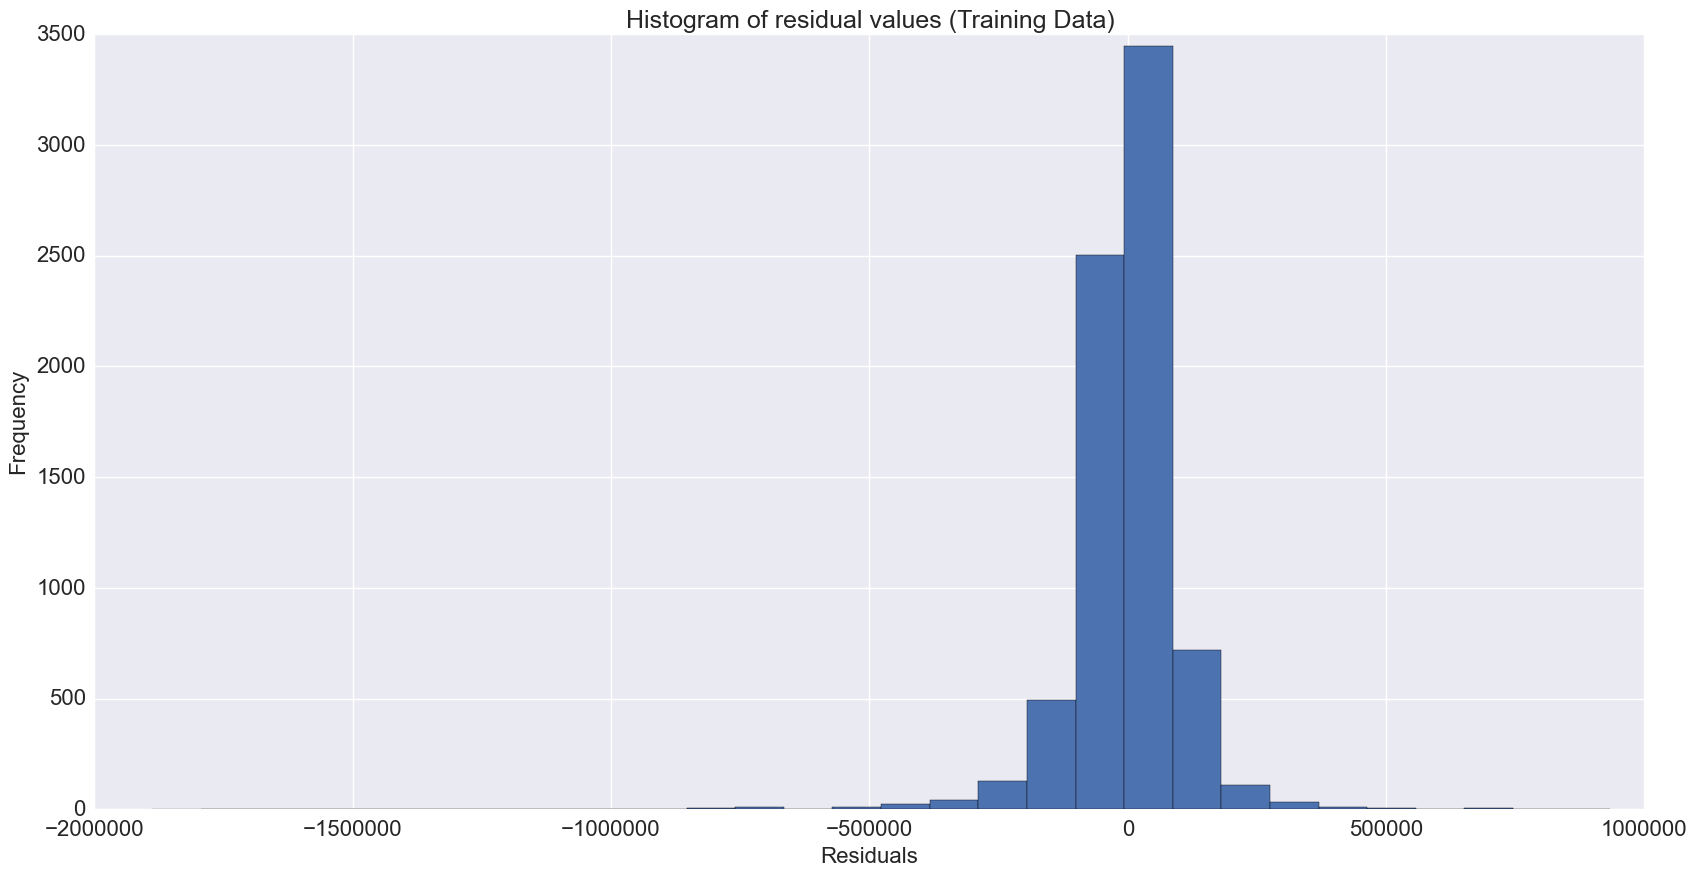

In [191]:
def evaluate(y_hat, y_true, X_true):
    # SSE
    sse = np.sum((y_hat-y_true)**2)
    # SST
    y_true_mean = np.mean(y_true)
    sst = np.sum((y_true-y_true_mean)**2)
    # R^2
    r_squared = 1 - sse/sst
    # Adjusted R^2
    n = X_true.shape[0]
    k = X_true.shape[1]
    temp = (1-r_squared)*((n-1.0)/(n-(k+1.0)))
    adj_r_sq = 1 - temp
    plt.figure(figsize = (20, 10))
    plt.hist(y_hat-y_true, bins=30)
    plt.title('Histogram of residual values (Training Data)', fontsize = 18)
    plt.ylabel('Frequency', fontsize = 16)
    plt.xlabel('Residuals', fontsize = 16)
    plt.tick_params(axis = 'both', which = 'major', labelsize = 16)
    return adj_r_sq

evaluate(reg.predict(X_test), y_test, X_test)

**Residuals** concentrated at 0, and this is good
- [Residual Plot Analysis](http://www.originlab.com/doc/Origin-Help/Residual-Plot-Analysis)

0.64535496771352419

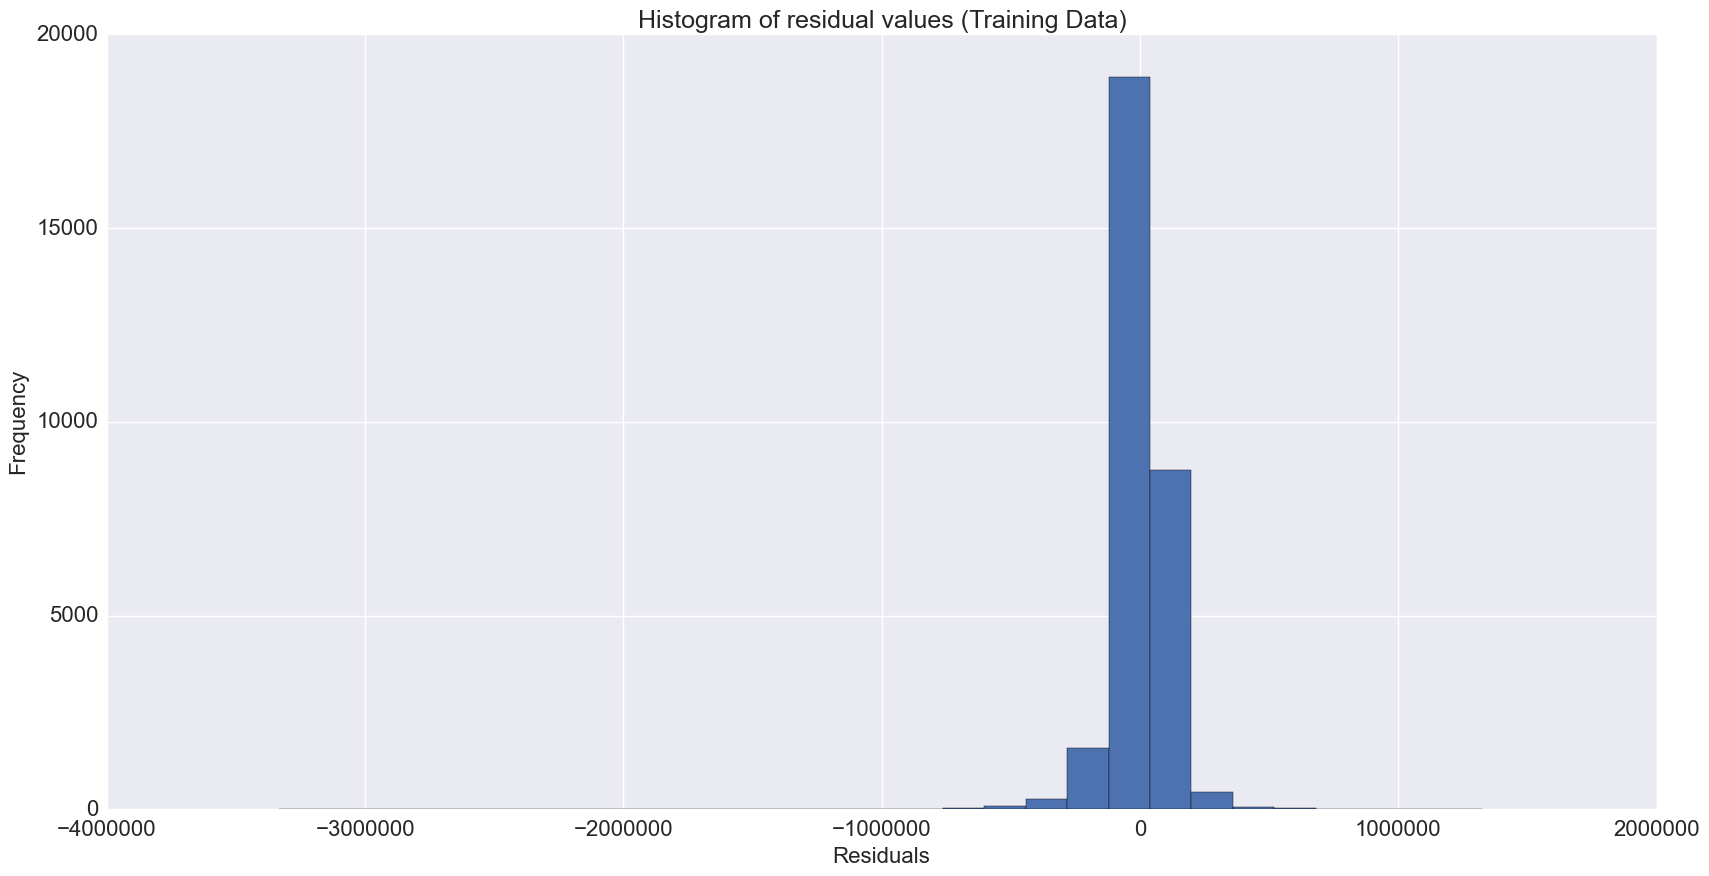

In [192]:
evaluate(reg.predict(X_train), y_train, X_train)

In [117]:
import pickle

# Save the best model: 'wb' - write in binary format
with open('regression.pkl', 'wb') as output_file:
    pickle.dump(reg, output_file)

In [118]:
import pickle

# Load the trained model
model = pickle.load(open("regression.pkl", 'rb'))

In [120]:
print X_test[0,:].shape
model.predict(X_test[0,:].reshape(1, -1))

(34,)


array([ 125434.12733965])

In [121]:
df['DwellingType'].unique()

array(['Single Family - Detached', 'Patio Home', 'Mfg/Mobile Housing',
       'Townhouse', 'Apartment Style/Flat', 'Gemini/Twin Home',
       'Loft Style', 'Modular/Pre-Fab'], dtype=object)

In [122]:
df.head(3)

,LivingArea,NumBedrooms,Pool,ClosePrice,DwellingType,num_baths
1,2230.0,4,Private,460000.0,Single Family - Detached,2.0
2,1601.0,3,Private,279900.0,Single Family - Detached,2.0
3,2440.0,4,None,228000.0,Single Family - Detached,2.5


In [123]:
data.columns

Index([u'bed_1', u'bed_2', u'bed_3', u'bed_4', u'bed_5', u'bed_6', u'bed_7',
       u'bed_8', u'bath_1', u'bath_1.5', u'bath_2', u'bath_2.5', u'bath_3',
       u'bath_3.5', u'bath_4', u'bath_4.5', u'bath_5', u'bath_5.5', u'bath_6',
       u'bath_6.5', u'bath_7', u'bath_7.5', u'bath_8', u'pool_community',
       u'pool_private', u'pool_none', u'apt', u'twin', u'loft', u'mobile',
       u'patio', u'single', u'townhouse', u'area', u'price'],
      dtype='object')

In [124]:
pool_cols = ['pool_both', 'pool_community', 'pool_private', 'pool_none']
dwelling_cols = ['apt', 'twin', 'loft', 'mobile', 'modular', 'patio', 'single', 'townhouse']
bed_cols = ['bed_0', 'bed_1', 'bed_2', 'bed_3', 'bed_4', 'bed_5', 'bed_6', 'bed_7', 'bed_8']
bath_cols = ['bath_0', 'bath_1', 'bath_1.5', 'bath_2', 'bath_2.5', 'bath_3', 'bath_3.5', 'bath_4', 
             'bath_4.5', 'bath_5', 'bath_5.5', 'bath_6', 'bath_6.5', 'bath_7', 'bath_7.5', 'bath_8']

In [125]:
# Create input_dict and input_list
input_dict = {}
for col in data.columns[:-1]:
    input_dict[col] = 0
    
print input_dict

input_list = []
for col in data.columns[:-1]:
    input_list.append(col)
    
print input_list

{'bath_8': 0, 'pool_private': 0, 'bath_4': 0, 'bath_5': 0, 'bath_6': 0, 'bath_7': 0, 'bath_1': 0, 'bath_2': 0, 'bath_3': 0, 'bath_1.5': 0, 'twin': 0, 'townhouse': 0, 'bath_2.5': 0, 'bath_3.5': 0, 'bath_6.5': 0, 'bath_7.5': 0, 'area': 0, 'bath_4.5': 0, 'bath_5.5': 0, 'bed_8': 0, 'bed_5': 0, 'bed_4': 0, 'bed_7': 0, 'bed_6': 0, 'bed_1': 0, 'bed_3': 0, 'bed_2': 0, 'loft': 0, 'apt': 0, 'pool_community': 0, 'mobile': 0, 'single': 0, 'pool_none': 0, 'patio': 0}
['bed_1', 'bed_2', 'bed_3', 'bed_4', 'bed_5', 'bed_6', 'bed_7', 'bed_8', 'bath_1', 'bath_1.5', 'bath_2', 'bath_2.5', 'bath_3', 'bath_3.5', 'bath_4', 'bath_4.5', 'bath_5', 'bath_5.5', 'bath_6', 'bath_6.5', 'bath_7', 'bath_7.5', 'bath_8', 'pool_community', 'pool_private', 'pool_none', 'apt', 'twin', 'loft', 'mobile', 'patio', 'single', 'townhouse', 'area']


In [126]:
with open('input_dict.pkl', 'wb') as output_file:
    pickle.dump(input_dict, output_file)
    
with open('input_list.pkl', 'wb') as output_file:
    pickle.dump(input_list, output_file)

In [167]:
df.head(3)

,LivingArea,NumBedrooms,Pool,ClosePrice,DwellingType,num_baths
1,2230.0,4,Private,460000.0,Single Family - Detached,2.0
2,1601.0,3,Private,279900.0,Single Family - Detached,2.0
3,2440.0,4,None,228000.0,Single Family - Detached,2.5


In [172]:
print df['LivingArea'].mean()
print df['LivingArea'].std()
print df['NumBedrooms'].mean()
print df['NumBedrooms'].std()
print df['num_baths'].mean()
print df['num_baths'].std()
print df['ClosePrice'].mean()
print df['ClosePrice'].std()

1935.74644368
806.233771292
3.24140666314
0.909942513059
2.26405341089
0.636595209078
240421.763591
194582.624693


In [187]:
df.head(3)

,LivingArea,NumBedrooms,Pool,ClosePrice,DwellingType,num_baths
1,2230.0,4,Private,460000.0,Single Family - Detached,2.0
2,1601.0,3,Private,279900.0,Single Family - Detached,2.0
3,2440.0,4,None,228000.0,Single Family - Detached,2.5


In [188]:
c = ['LivingArea', 'NumBedrooms', 'Pool', 'ClosePrice', 'DwellingType', 'NumBaths']
df.columns = c
df.head(3)

,LivingArea,NumBedrooms,Pool,ClosePrice,DwellingType,NumBaths
1,2230.0,4,Private,460000.0,Single Family - Detached,2.0
2,1601.0,3,Private,279900.0,Single Family - Detached,2.0
3,2440.0,4,None,228000.0,Single Family - Detached,2.5


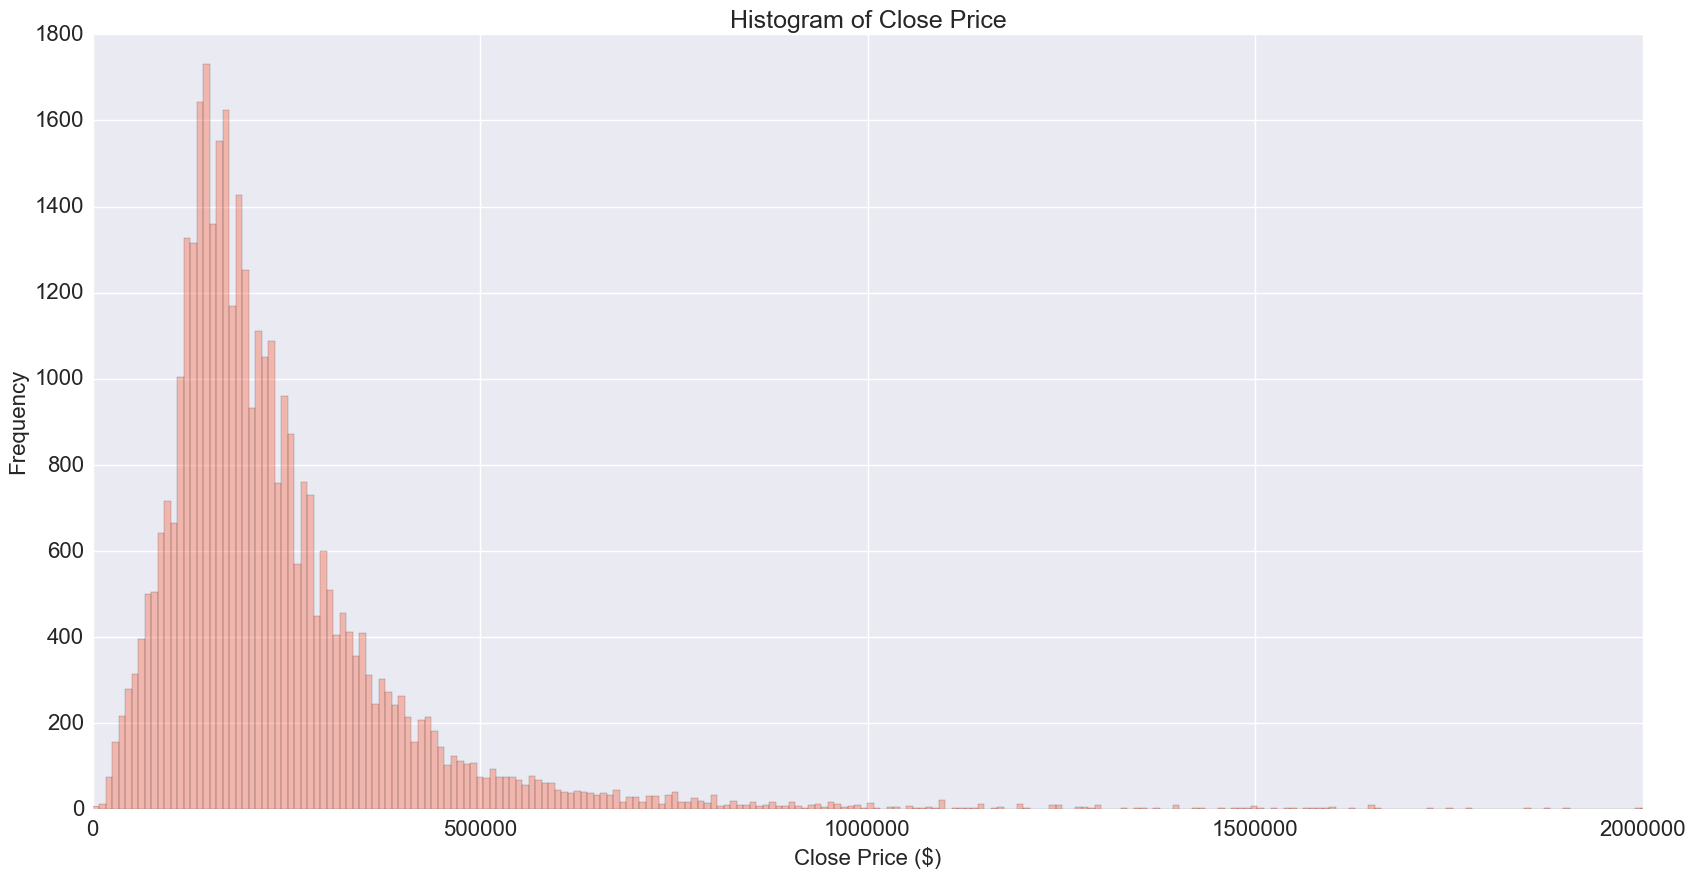

In [185]:
plt.figure(figsize = (20, 10))
sns.distplot(df['ClosePrice'].dropna(), kde = False, rug = False, color =  '#fb6a4a')
plt.xlabel('Close Price ($)', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 16)
plt.xlim(0, 2000000)
plt.title('Histogram of Close Price', fontsize = 18)

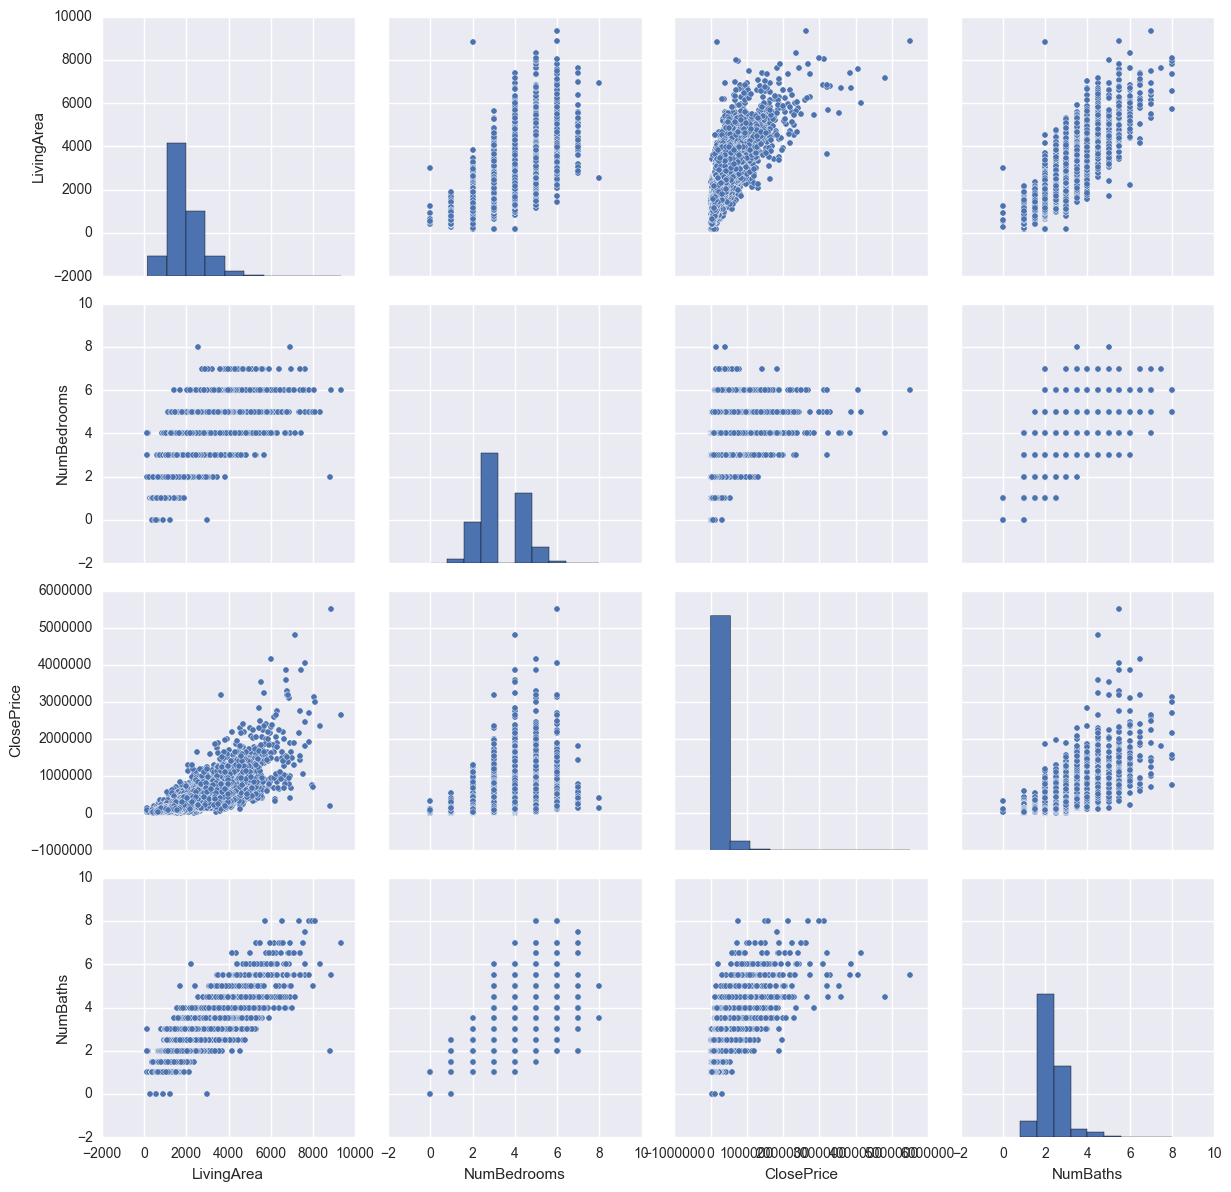

In [189]:
sns.pairplot(df)

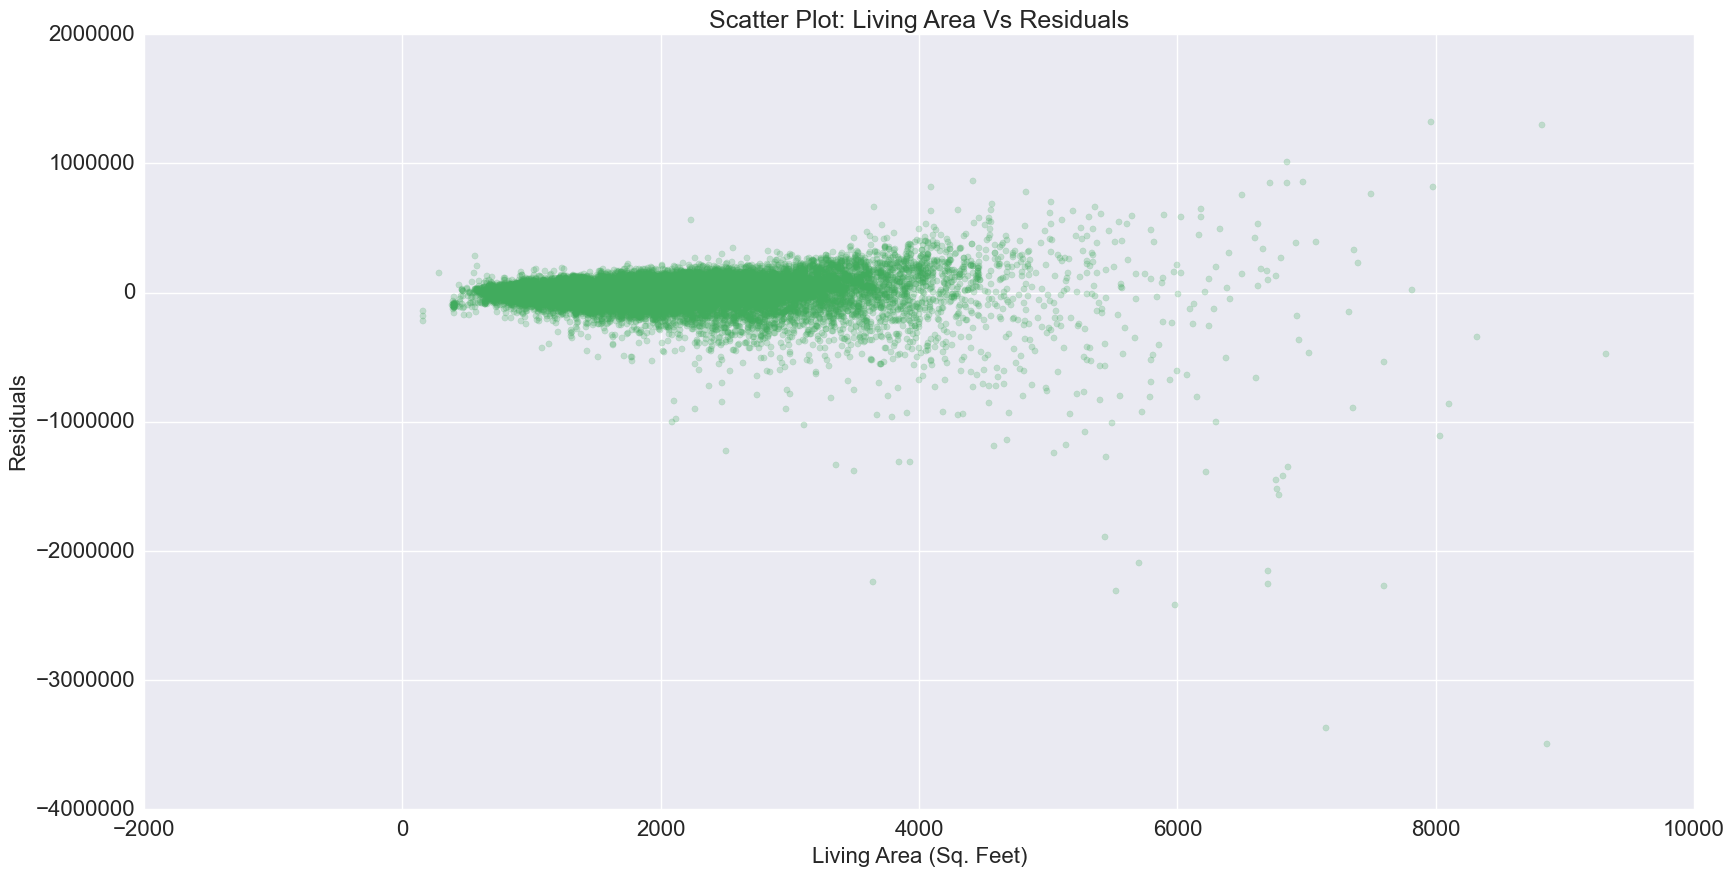

In [203]:
r = reg.predict(X_train) - y_train

plt.figure(figsize = (20, 10))
plt.scatter(X_train[:,-1],r)
plt.xlabel('Living Area (Sq. Feet)', fontsize = 16)
plt.ylabel('Residuals', fontsize = 16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 16)
plt.title('Scatter Plot: Living Area Vs Residuals', fontsize = 18)

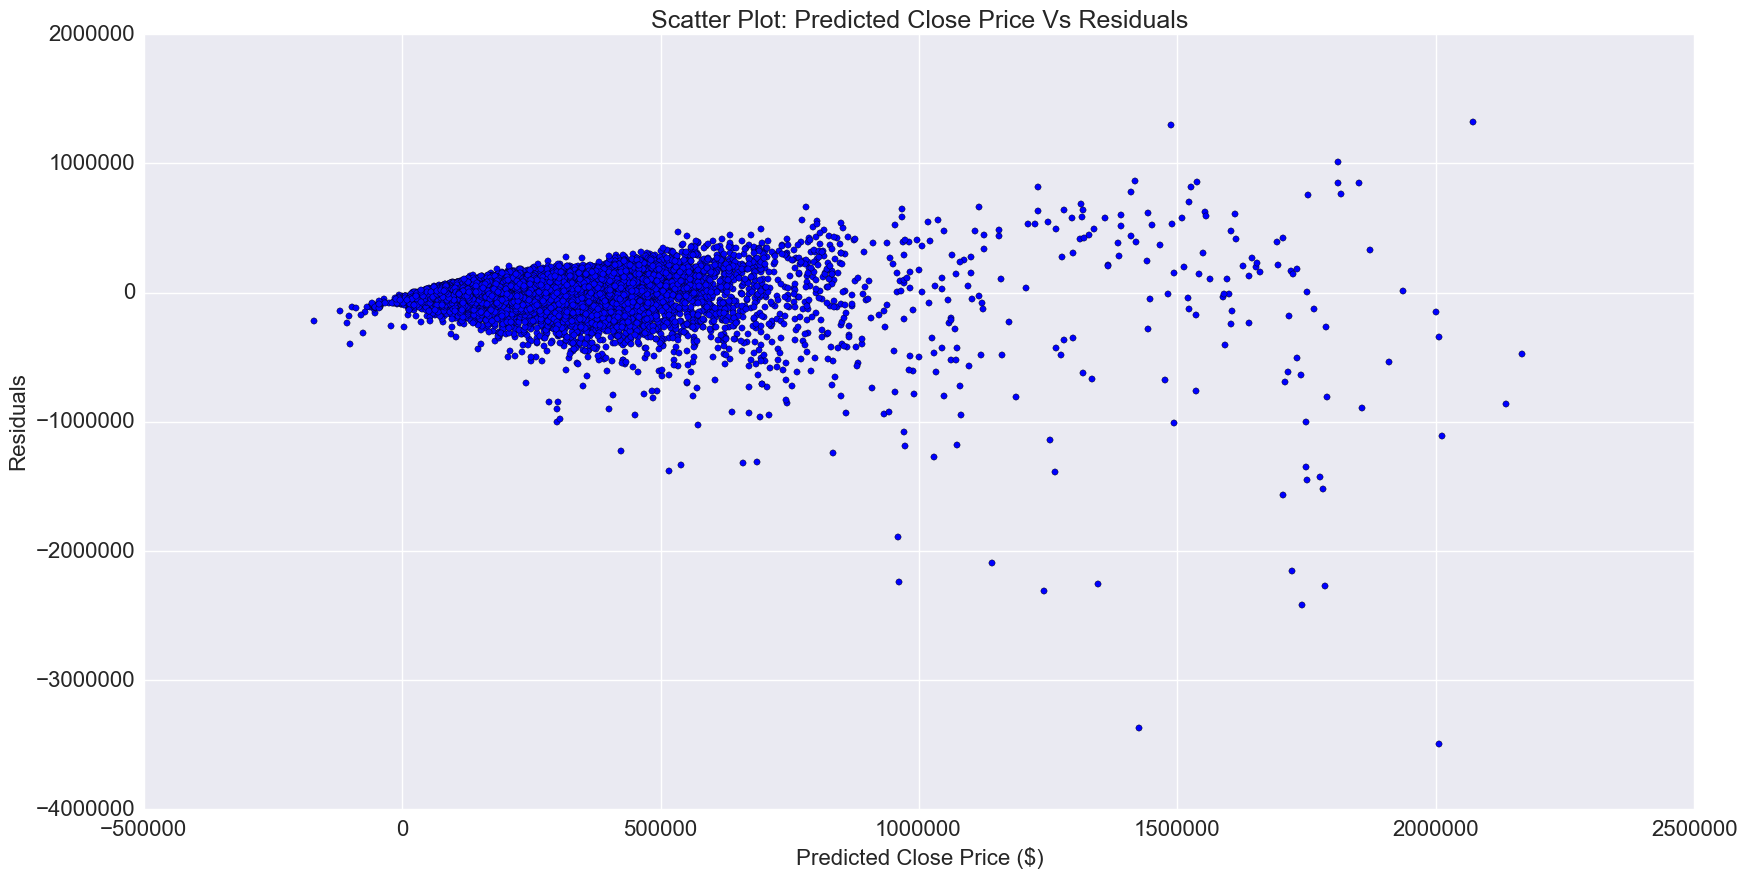

In [204]:
r = reg.predict(X_train) - y_train

plt.figure(figsize = (20, 10))
plt.scatter(reg.predict(X_train),r)
plt.xlabel('Predicted Close Price ($)', fontsize = 16)
plt.ylabel('Residuals', fontsize = 16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 16)
plt.title('Scatter Plot: Predicted Close Price Vs Residuals', fontsize = 18)

**Ridge Regression** minimizes the linear regression cost function along with squared $\ell ^2$ norm of the weight vector. As such, it shrinks the estimated weights toward 0, this introduces some bias, but can greatly reduce the variance, resulting in a better mean-squared error

Given:
- Response vector $y \in \mathbb{R}^{n}$
- Predictor matrix $X \in \mathbb{R}^{n \times m}$

Ridge regression coefficients are defined as:
$$\hat{\beta}^{ridge} = \underset{\beta \in \mathbb{R}^{m}}{\mathrm{argmin}}\sum_{i=1}^{n}(y_i - x_{i}^T \beta)^2 + \lambda \sum_{j=1}^{m}\beta_j^2$$
$$\hat{\beta}^{ridge} = \underset{\beta \in \mathbb{R}^{m}}{\mathrm{argmin}} \:\underbrace{||y - X\beta||^2_2}_{loss} + \lambda \:\underbrace{||\beta||^2_2}_{penalty}$$

- $\lambda$ is regularization parameter and it controls the strength of penalty term.
    - $\lambda = 0 \implies$ Linear Regression
    - $\lambda = \infty \implies \hat{\beta}^{ridge}=0$, i.e. Weights shrinks towards 0
- Bias and Variance
    - The bias increases as  $\lambda$ (amount of shrinkage) increases
    - The variance decreases as  $\lambda$ (amount of shrinkage) increases

---